In [1]:
#pip install --upgrade vnstock

In [1]:
import vnstock as vn
from datetime import datetime 
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import pandas_ta as ta
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")

In [2]:
df = vn.listing_companies()

In [3]:
df.head()

ticker comGroupCode                                          organName  \
0    SSI         HOSE                    Công ty Cổ phần Chứng khoán SSI   
1    BCM         HOSE  Tổng Công ty Đầu tư và Phát triển Công nghiệp ...   
2    VHM         HOSE                           Công ty Cổ phần Vinhomes   
3    VIC         HOSE                     Tập đoàn Vingroup - Công ty CP   
4    VRE         HOSE                      Công ty Cổ phần Vincom Retail   

    organShortName organTypeCode comTypeCode               icbName  \
0  Chứng khoán SSI            DN          CK  Môi giới chứng khoán   
1      Becamex IDC            DN          CT          Bất động sản   
2         Vinhomes            DN          CT          Bất động sản   
3         VinGroup            DN          CT          Bất động sản   
4    Vincom Retail            DN          CT          Bất động sản   

                                         icbNamePath     sector  \
0  Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...  Tài chính   
1   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   
2   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   
3   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   
4   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   

            industry              group              subgroup  icbCode  VN30  \
0  Dịch vụ tài chính  Dịch vụ tài chính  Môi giới chứng khoán     8777  True   
1       Bất động sản       Bất động sản          Bất động sản     8633  True   
2       Bất động sản       Bất động sản          Bất động sản     8633  True   
3       Bất động sản       Bất động sản          Bất động sản     8633  True   
4       Bất động sản       Bất động sản          Bất động sản     8633  True   

   VNMID  VN100  VNSML  VNALL  HNX30  VNX50  VNXALL  VNDIAMOND  VNFINLEAD  \
0  False   True  False   True  False   True    True      False       True   
1  False   True  False   True  False  False   False      False      False   
2  False   True  False   True  False   True    True      False      False   
3  False   True  False   True  False   True    True      False      False   
4  False   True  False   True  False   True    True      False      False   

   VNFINSELECT   VNSI  VNCOND  VNCONS  VNENE  VNFIN  VNHEAL  VNIND   VNIT  \
0         True  False   False   False  False   True   False  False  False   
1        False  False   False   False  False  False   False  False  False   
2        False  False   False   False  False  False   False  False  False   
3        False   True   False   False  False  False   False  False  False   
4        False  False   False   False  False  False   False  False  False   

   VNMAT  VNREAL  VNUTI  
0  False   False  False  
1  False    True  False  
2  False    True  False  
3  False    True  False  
4  False    True  False

In [4]:
unique_industries = df['industry'].unique()
unique_industries

array(['Dịch vụ tài chính', 'Bất động sản', 'Bảo hiểm',
       'Điện, nước & xăng dầu khí đốt', 'Ngân hàng', 'Tài nguyên Cơ bản',
       'Hóa chất', 'Thực phẩm và đồ uống', 'Du lịch và Giải trí',
       'Bán lẻ', 'Dầu khí', 'Công nghệ Thông tin', 'Viễn thông',
       'Ô tô và phụ tùng', 'Hàng cá nhân & Gia dụng', 'Truyền thông',
       'Y tế', 'Xây dựng và Vật liệu', 'Hàng & Dịch vụ Công nghiệp'],
      dtype=object)

In [5]:
financial_services_companies = df[df['industry'] == 'Dịch vụ tài chính']

unique_financial_icbNames = financial_services_companies['icbName'].unique()

unique_financial_icbNames

array(['Môi giới chứng khoán', 'Quỹ đầu tư', 'Tài chính đặc biệt',
       'Quản lý tài sản', 'Tài chính cá nhân'], dtype=object)

In [6]:
brokerage_companies = df[df['icbName'] == 'Môi giới chứng khoán']

unique_comGroupCodes = brokerage_companies['comGroupCode'].unique()

unique_comGroupCodes

array(['HOSE', 'UPCOM', 'HNX'], dtype=object)

In [7]:
#filtered_companies = df[(df['comGroupCode'].isin(['HOSE', 'HNX'])) & (df['icbName'] == 'Môi giới chứng khoán')]
filtered_companies = df[(df['icbName'] == 'Môi giới chứng khoán')]
filtered_companies

ticker comGroupCode                                          organName  \
0     SSI         HOSE                    Công ty Cổ phần Chứng khoán SSI   
55    ABW        UPCOM                Công ty Cổ phần Chứng khoán An Bình   
56    AGR         HOSE               Công ty Cổ phần Chứng khoán AGRIBANK   
57    APG         HOSE                    Công ty Cổ phần Chứng khoán APG   
58    APS          HNX  Công ty Cổ phần Chứng khoán Châu Á - Thái Bình...   
60    BMS        UPCOM               Công ty Cổ phần Chứng khoán Bảo Minh   
61    BSI         HOSE                   Công ty Cổ phần Chứng khoán BIDV   
62    BVS          HNX               Công ty Cổ phần Chứng khoán Bảo Việt   
64    CTS         HOSE  Công ty Cổ phần Chứng khoán Ngân hàng Công thư...   
65    DSC        UPCOM                    Công ty Cổ phần Chứng khoán DSC   
68    ART        UPCOM                    Công ty Cổ phần Chứng khoán BOS   
69    FTS         HOSE                    Công ty Cổ phần Chứng khoán FPT   
70    AAS        UPCOM            Công ty Cổ phần Chứng khoán SmartInvest   
71    HBS          HNX               Công ty Cổ phần Chứng khoán Hòa Bình   
72    HCM         HOSE  Công ty Cổ phần Chứng khoán Thành phố Hồ Chí Minh   
73    HAC        UPCOM              Công ty Cổ phần Chứng khoán Hải Phòng   
75    IVS          HNX  Công ty Cổ phần Chứng khoán Guotai Junan (Việt...   
76    EVS          HNX                Công ty Cổ phần Chứng khoán Everest   
78    ORS         HOSE             Công ty Cổ phần Chứng khoán Tiên Phong   
79    CSI        UPCOM    Công ty Cổ phần Chứng khoán Kiến thiết Việt Nam   
80    PHS        UPCOM               Công ty Cổ phần Chứng khoán Phú Hưng   
81    PSI          HNX                Công ty Cổ phần Chứng khoán Dầu khí   
82    SBS        UPCOM                    Công ty Cổ phần Chứng khoán SBS   
83    SHS          HNX       Công ty Cổ phần Chứng khoán Sài Gòn - Hà Nội   
84    TCI        UPCOM             Công ty Cổ phần Chứng khoán Thành Công   
85    MBS          HNX                     Công ty Cổ phần Chứng khoán MB   
86    TVB         HOSE               Công ty Cổ phần Chứng khoán Trí Việt   
88    TVS         HOSE             Công ty Cổ phần Chứng khoán Thiên Việt   
89    VCI         HOSE                Công ty Cổ phần Chứng khoán Vietcap   
90    VDS         HOSE              Công ty Cổ phần Chứng khoán Rồng Việt   
91    VFS          HNX              Công ty Cổ phần Chứng khoán Nhất Việt   
92    VUA        UPCOM       Công ty Cổ phần Chứng khoán Stanley Brothers   
93    VIG          HNX  Công ty Cổ phần Chứng khoán Đầu tư Tài chính V...   
94    VIX         HOSE                    Công ty Cổ phần Chứng khoán VIX   
95    VND         HOSE               Công ty Cổ phần Chứng khoán VNDIRECT   
96    WSS          HNX               Công ty Cổ phần Chứng khoán Phố Wall   

                           organShortName organTypeCode comTypeCode  \
0                         Chứng khoán SSI            DN          CK   
55                    Chứng khoán An Bình            DN          CK   
56                               Agriseco            DN          CK   
57                        Chứng khoán APG            DN          CK   
58                        CK Châu Á - TBD            DN          CK   
60                   Chứng khoán Bảo Minh            DN          CK   
61                       Chứng khoán BIDV            DN          CK   
62                   Chứng khoán Bảo Việt            DN          CK   
64                 Chứng khoán Vietinbank            DN          CK   
65                        Chứng khoán DSC            DN          CK   
68                        Chứng khoán BOS            DN          CK   
69                        Chứng khoán FPT            DN          CK   
70                Chứng khoán SmartInvest            DN          CK   
71                   Chứng khoán Hòa Bình            DN          CK   
72                        Chứng khoán HSC            DN          CK   
73               

In [8]:
stocklist = filtered_companies.ticker
stockname = filtered_companies.organShortName

In [9]:
stock_list = stocklist.tolist()
print(stock_list)
print(len(stock_list))
stock_string = ', '.join(stock_list)
print(stock_string)


['SSI', 'ABW', 'AGR', 'APG', 'APS', 'BMS', 'BSI', 'BVS', 'CTS', 'DSC', 'ART', 'FTS', 'AAS', 'HBS', 'HCM', 'HAC', 'IVS', 'EVS', 'ORS', 'CSI', 'PHS', 'PSI', 'SBS', 'SHS', 'TCI', 'MBS', 'TVB', 'TVS', 'VCI', 'VDS', 'VFS', 'VUA', 'VIG', 'VIX', 'VND', 'WSS']
36
SSI, ABW, AGR, APG, APS, BMS, BSI, BVS, CTS, DSC, ART, FTS, AAS, HBS, HCM, HAC, IVS, EVS, ORS, CSI, PHS, PSI, SBS, SHS, TCI, MBS, TVB, TVS, VCI, VDS, VFS, VUA, VIG, VIX, VND, WSS


In [10]:
compare_data = vn.stock_ls_analysis(stock_string).T.reset_index()
compare_data

Mã CP Vốn hóa (tỷ)    Giá Số phiên tăng/giảm liên tiếp    P/E   PEG  P/B  \
0    ABW         1013  11807                            1   28.1   0.6  0.9   
1    APS          556   6800                            1   -1.8   0.0  0.7   
2    ART          126  16300                            0   46.6   0.0  1.4   
3    BSI         9429  46200                           -1   26.0   0.2  2.0   
4    CSI          504  30354                            1  590.0  -8.1  2.8   
5    CTS         4164  28050                            2   27.5  -0.6  2.1   
6    DSC         3905  19072                            0   35.6   0.2  1.8   
7    EVS         1417   8700                            3   12.6  -0.3  0.7   
8    FTS         9334  43200                           -1   18.8   0.8  2.6   
9    HBS          267   8100                            0   16.4   0.2  0.6   
10   IVS          714  10300                            0   28.5 -20.5  0.9   
11   MBS         9934  22700                            0   20.5  -1.0  2.0   
12   ORS         3460  17250                           -1   22.1  -1.1  1.4   
13   PHS         2160  14400                            0   46.7  -1.1  1.4   
14   SHS        15206  18700                            0   29.1  -2.6  1.5   
15   TVB          632   5690                            3   54.0  -0.6  0.6   
16   TVS         3208  21500                            2   13.7   0.6  1.6   
17   VFS         2316  19300                            0   28.2  -1.2  1.6   
18   VIX        11146  16750                            2   16.7   1.0  1.3   
19   VND        27219  22300                           -1   23.3  -0.5  1.7   

   EV/EBITDA Cổ tức    ROE    ROA Thanh toán hiện hành Thanh toán nhanh  \
0       17.7    0.0  0.033   0.02                  1.8              1.8   
1       -0.9    0.0 -0.336  -0.33                 56.0             56.0   
2        2.8    0.0   0.03  0.029                 81.0             81.0   
3       20.1    0.0  0.081  0.046                  2.2              2.2   
4       63.2    0.0  0.005  0.005                154.6            154.6   
5       18.9    0.0  0.078  0.022                  1.3              1.3   
6       20.1    0.0  0.067  0.037                  2.2              2.2   
7        9.0    0.0   0.06  0.047                  6.5              6.5   
8       18.1    0.0  0.144  0.073                  1.9              1.9   
9       12.5    0.0   0.04   0.04                109.1            109.1   
10      22.8    0.0  0.034  0.033                 31.7             31.7   
11      17.3    0.0  0.111   0.04                  1.5              1.5   
12       4.6    0.0  0.065  0.023                  4.4              4.4   
13      18.2    0.0  0.029  0.011                  1.6              1.6   
14      19.2    0.0  0.053  0.047                 17.0             17.0   
15      18.1    0.0  0.011   0.01                117.3            117.3   
16       6.1    0.0  0.126  0.023                  0.8              0.8   
17      20.0    0.0  0.068  0.067                 78.6             78.6   
18      10.8    0.0  0.081  0.079                 98.1             98.1   
19      15.1    0.0  0.077  0.028                  1.6              1.6   

   Nợ/Vốn CSH Nợ/EBITDA Doanh thu quý gần nhất   RSI    RS  
0         0.6       6.9                  0.459  59.3  60.0  
1         0.0       0.0                 -0.801  48.3   3.0  
2         0.0       0.0                  0.038   0.0  34.0  
3         0.7       4.9                   0.22  52.7  59.0  
4         0.0       0.0                 -0.016  48.2   8.0  
5         2.8       9.0                 -0.325  55.8  55.0  
6         0.8       5.4                 -0.029  55.6  50.0  
7         0.1       1.5                  1.147  56.8  48.0  
8         0.7       2.9                  0.251  50.1  49.0  
9         0.0       0.0                 -0.304  49.6  11.0  
10        0.0       0.4                 -0.139  54.8  63.0  
11        1.5       7.1            

We can see that in the list of securities companies, there are a total of 36 companies, but in the 'compare_data' list, there are only 19 companies.

The reason is that, according to the 'vnstock' package, missing data will be omitted.

In [11]:
vn.industry_analysis("VCI").T.reset_index()

Mã CP Vốn hóa (tỷ)    Giá Số phiên tăng/giảm liên tiếp   P/E  PEG  P/B  \
0    VCI        18681  42450                           -1  46.7 -0.7  2.5   
1    SSI        49397  33600                            2  25.0 -1.6  2.2   
2    VND        27219  22300                           -1  23.3 -0.5  1.7   
3    HCM        18709  24700                           -1  30.0 -0.9  2.3   
4    SHS        15206  18700                            0  29.1 -2.6  1.5   
5    VIX        11146  16750                            2  16.7  1.0  1.3   
6    MBS         9934  22700                            0  20.5 -1.0  2.0   
7    BSI         9429  46200                           -1  26.0  0.2  2.0   
8    FTS         9334  43200                           -1  18.8  0.8  2.6   
9    CTS         4164  28050                            2  27.5 -0.6  2.1   
10   DSC         3905  19072                            0  35.6  0.2  1.8   
11   VDS         3602  17250                            2  13.5  0.0  1.6   
12   ORS         3460  17250                           -1  22.1 -1.1  1.4   
13   AGR         3457  16300                            2  22.4 -1.7  1.4   
14   TVS         3208  21500                            2  13.7  0.6  1.6   
15   PHS         2160  14400                            0  46.7 -1.1  1.4   
16   AAS         1952   8617                            1  17.7 -0.2  0.8   
17   APG         1828  12150                            2 -32.3  0.2  1.1   
18   EVS         1417   8700                            3  12.6 -0.3  0.7   
19   SBS         1071   7437                            1 -15.5  0.0  3.1   

   EV/EBITDA Cổ tức    ROE    ROA Thanh toán hiện hành Thanh toán nhanh  \
0       21.0    0.0  0.057  0.024                  1.8              1.8   
1       19.5    0.0   0.09   0.04                  1.6              1.6   
2       15.1    0.0  0.077  0.028                  1.6              1.6   
3       30.1    0.0  0.077  0.033                  1.9              1.9   
4       19.2    0.0  0.053  0.047                 17.0             17.0   
5       10.8    0.0  0.081  0.079                 98.1             98.1   
6       17.3    0.0  0.111   0.04                  1.5              1.5   
7       20.1    0.0  0.081  0.046                  2.2              2.2   
8       18.1    0.0  0.144  0.073                  1.9              1.9   
9       18.9    0.0  0.078  0.022                  1.3              1.3   
10      20.1    0.0  0.067  0.037                  2.2              2.2   
11      14.3    0.0  0.142  0.053                  1.8              1.8   
12       4.6    0.0  0.065  0.023                  4.4              4.4   
13      17.7    0.0  0.063  0.053                  4.1              4.1   
14       6.1    0.0  0.126  0.023                  0.8              0.8   
15      18.2    0.0  0.029  0.011                  1.6              1.6   
16      23.8    0.0  0.057  0.043                  4.3              4.3   
17     -45.2    0.0 -0.034 -0.032                 35.6             35.6   
18       9.0    0.0   0.06  0.047                  6.5              6.5   
19     -21.4    0.0 -0.184 -0.135                  2.3              2.3   

   Biên LNG Biên LNST Nợ/Vốn CSH Nợ/EBITDA LNST 5 năm Doanh thu 5 năm  \
0     0.597     0.268        1.2       6.2      0.058           0.155   
1     0.664     0.366        1.3       6.4      0.079           0.169   
2     0.704     0.363        1.4       6.4      0.205           0.411   
3      0.43      0.26        1.0      11.8       0.09           0.205   
4     0.572     0.411        0.0       0.7     -0.152           0.072   
5      0.79     0.617        0.0       0.0      0.318           0.251   
6     0.679     0.308        1.5       7.1      0.846           0.185   
7     0.616     0.318        0.7       4.9     -0.085           0.139   
8      0.71     0.565        0.7       2.9      0.122           0.219   
9     0.731     0.265        2.8       9.0     -0.083           0.249   
10    

In [12]:
vonnhoa_list = []
p_b_list = []
roe_list = []
for stock_code in stock_list:
   
    d = vn.industry_analysis(stock_code).T.reset_index()
    vonnhoa = d[(d["Mã CP"] == stock_code)]["Vốn hóa (tỷ)"].values[0]
    p_b = d[(d["Mã CP"] == stock_code)]["P/B"].values[0]
    roe = d[(d["Mã CP"] == stock_code)]["ROE"].values[0]
  
    vonnhoa_list.append(vonnhoa) 
    p_b_list.append(p_b)
    roe_list.append(roe)

In [13]:
dfr = pd.DataFrame({'Mã CP': stock_list, 
                    'Vốn hóa (tỷ)': vonnhoa_list, 
                    'P/B': p_b_list,
                    'ROE': roe_list
                   })
dfr

Mã CP  Vốn hóa (tỷ)  P/B    ROE
0    SSI       49397.0  2.2  0.090
1    ABW        1013.0  0.9  0.033
2    AGR        3457.0  1.4  0.063
3    APG        1828.0  1.1 -0.034
4    APS         556.0  0.7 -0.336
5    BMS         736.0  0.9  0.058
6    BSI        9429.0  2.0  0.081
7    BVS        1819.0  0.8  0.081
8    CTS        4164.0  2.1  0.078
9    DSC        3905.0  1.8  0.067
10   ART         126.0  1.4  0.030
11   FTS        9334.0  2.6  0.144
12   AAS        1952.0  0.8  0.057
13   HBS         267.0  0.6  0.040
14   HCM       18709.0  2.3  0.077
15   HAC           NaN  NaN    NaN
16   IVS         714.0  0.9  0.034
17   EVS        1417.0  0.7  0.060
18   ORS        3460.0  1.4  0.065
19   CSI         504.0  2.8  0.005
20   PHS        2160.0  1.4  0.029
21   PSI         533.0  0.8  0.051
22   SBS        1071.0  3.1 -0.184
23   SHS       15206.0  1.5  0.053
24   TCI        1362.0  1.0  0.045
25   MBS        9934.0  2.0  0.111
26   TVB         632.0  0.6  0.011
27   TVS        3208.0  1.6  0.126
28   VCI       18681.0  2.5  0.057
29   VDS        3602.0  1.6  0.142
30   VFS        2316.0  1.6  0.068
31   VUA         768.0  2.6 -0.188
32   VIG         343.0  1.1  0.083
33   VIX       11146.0  1.3  0.081
34   VND       27219.0  1.7  0.077
35   WSS         312.0  0.6  0.052

In [14]:
dfr = dfr.dropna()
print(len(dfr))

35


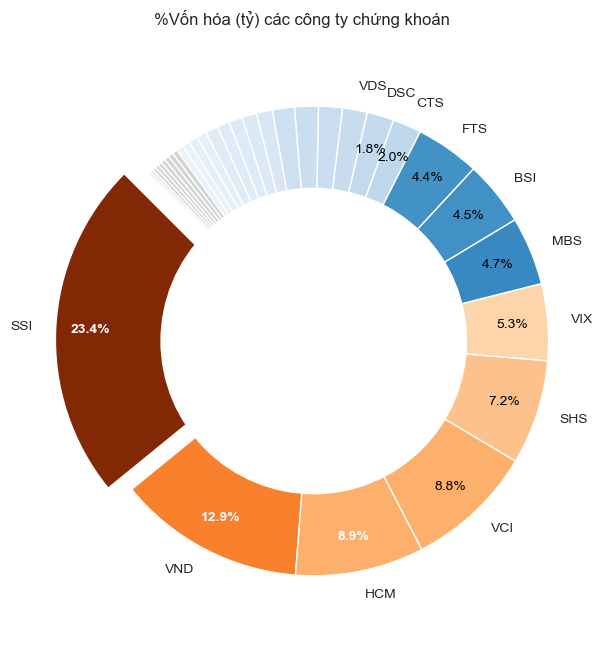

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return plt.cm.Oranges(value / 50000)  # Sử dụng colormap 'Oranges'
    elif 1000 < value <= 10000:
        return plt.cm.Blues(value / 15000)  # Sử dụng colormap 'Greens'
    elif value <= 1000:
        return 'lightgray'

# Hàm tùy chỉnh để hiển thị phần trăm
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 1.8 else ''

# Sắp xếp dữ liệu từ lớn đến bé
dfr_sorted = dfr.sort_values(by='Vốn hóa (tỷ)', ascending=False)

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_sorted['color'] = dfr_sorted['Vốn hóa (tỷ)'].apply(assign_color)

labels = ['' if i >= 12 else v for i, v in enumerate(dfr_sorted["Mã CP"])]

# Tạo danh sách explode
explode = [0.1 if i == 0 else 0 for i in range(len(dfr_sorted))]

# Vẽ biểu đồ pie chart
plt.figure(figsize=(7, 8))  # Đặt kích thước hình vẽ thành 10x10
patches, texts, autotexts = plt.pie(dfr_sorted["Vốn hóa (tỷ)"], 
                                    labels=labels, 
                                    autopct=custom_autopct, startangle=135, 
                                    colors=dfr_sorted['color'], explode=explode, pctdistance=0.85)

# Vẽ một vòng tròn trắng ở giữa
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('%Vốn hóa (tỷ) các công ty chứng khoán')

# Đặt màu cho phần trăm
for i, autotext in enumerate(autotexts):
    if i < 3:
        autotext.set_color('white')
        autotext.set_weight('bold')
    else:
        autotext.set_color('black')

output_file_path = '%Vốn_hoá.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()


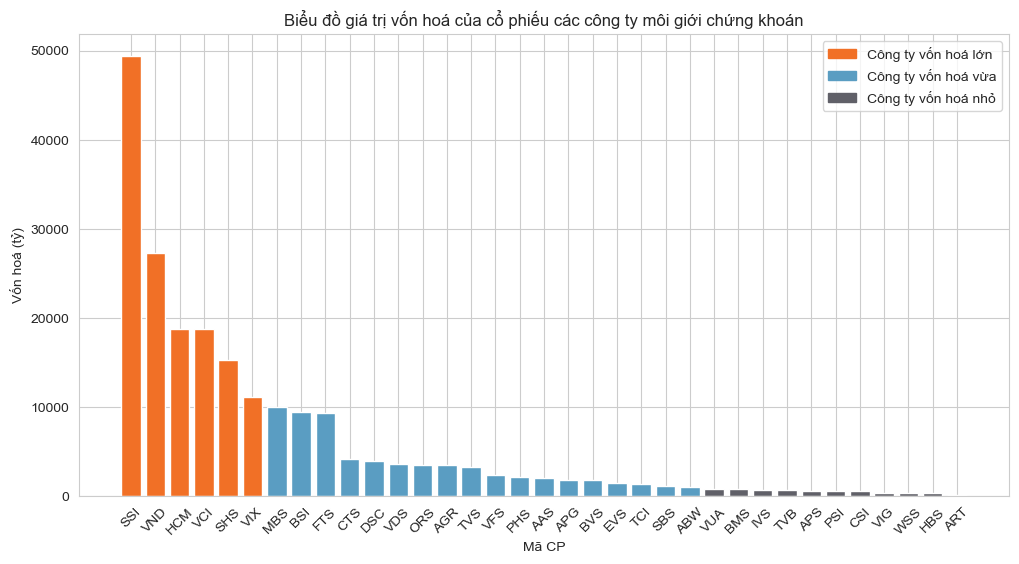

<Figure size 1920x1440 with 0 Axes>

In [16]:
# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return '#F17026'  # Màu cam nếu vốn hoá > 10000
    elif 1000 < value <= 10000:
        return '#5A9DC2'  # Màu xanh nếu vốn hoá lớn hơn 1000 nhỏ hơn 10000
    else:
        return '#606068'  # Màu xám cho các giá trị còn lại

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_sorted['color'] = dfr_sorted['Vốn hóa (tỷ)'].apply(assign_color)

fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ bar với màu sắc tương ứng
bar1 = ax.bar(dfr_sorted['Mã CP'], dfr_sorted['Vốn hóa (tỷ)'], label='Vốn hoá (tỷ)', color=dfr_sorted['color'])

ax.set_ylabel('Vốn hoá (tỷ)')
ax.set_xlabel('Mã CP')
ax.set_title('Biểu đồ giá trị vốn hoá của cổ phiếu các công ty môi giới chứng khoán')
ax.set_xticks(dfr_sorted['Mã CP'])
ax.set_xticklabels(dfr_sorted['Mã CP'], rotation=45)
ax.tick_params(axis='x', labelsize=10)

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở dưới bên phải
plt.legend(handles=[orange_patch, green_patch, gray_patch], loc='upper right')

output_file_path = 'Bar_chart_Vốn_hoá.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=300)
plt.show()

In [17]:
mean_p_b = dfr["P/B"].mean()
print(mean_p_b)


1.497142857142857


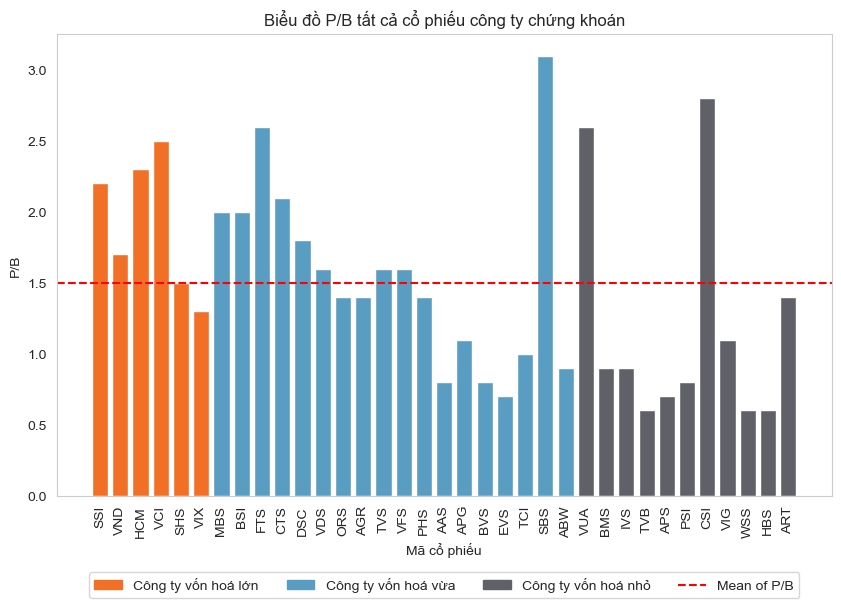

<Figure size 1920x1440 with 0 Axes>

In [18]:
# Lọc DataFrame để chỉ giữ lại các hàng có ROE dương
#dfr_sorted_positive_roe = dfr_sorted.loc[dfr_sorted['ROE'] > 0]

# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return '#F17026'  # Màu cam nếu vốn hoá > 10000
    elif 1000 < value <= 10000:
        return '#5A9DC2'  # Màu xanh nếu vốn hoá lớn hơn 1000 nhỏ hơn 10000
    else:
        return '#606068'  # Màu xám cho các giá trị còn lại

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_sorted['color'] = dfr_sorted['Vốn hóa (tỷ)'].apply(assign_color)

plt.figure(figsize=(10, 6))
plt.bar(dfr_sorted["Mã CP"], dfr_sorted["P/B"], 
        label="P/B", color=dfr_sorted['color'])
mean_pb_line = plt.axhline(y=dfr_sorted["P/B"].mean(), 
                           color='r', linestyle='--', 
                           label="Mean of P/B")

plt.xlabel("Mã cổ phiếu")
plt.ylabel("P/B")
plt.title("Biểu đồ P/B tất cả cổ phiếu công ty chứng khoán")
plt.xticks(rotation=90)
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch, gray_patch, mean_pb_line], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

output_file_path = 'bar_pb_all.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11688\3641046856.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr_positive_roe['color'] = dfr_positive_roe['Vốn hóa (tỷ)'].apply(assign_color)


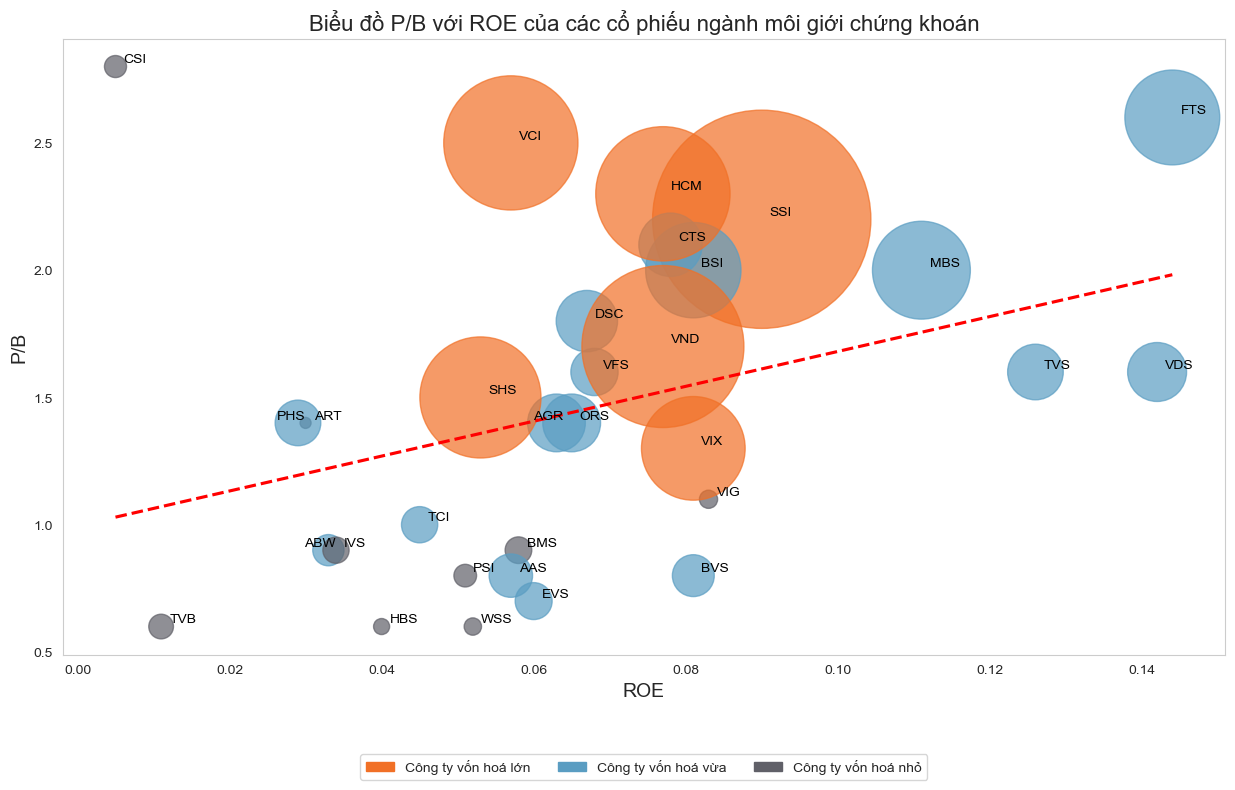

<Figure size 3840x2880 with 0 Axes>

In [19]:
# Lọc DataFrame để chỉ giữ lại các hàng có ROE dương
dfr_positive_roe = dfr.loc[dfr['ROE'] > 0]

# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return '#F17026'  # Màu cam nếu vốn hoá > 10000
    elif 1000 < value <= 10000:
        return '#5A9DC2'  # Màu xanh nếu vốn hoá lớn hơn 1000 nhỏ hơn 10000
    else:
        return '#606068'  # Màu xám cho các giá trị còn lại

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_positive_roe['color'] = dfr_positive_roe['Vốn hóa (tỷ)'].apply(assign_color)

from adjustText import adjust_text

# Scatter plot with regression line (without confidence interval), size by log(Market Cap)
plt.figure(figsize=(15, 8))

# Use plt.scatter to create the scatter plot with custom colors
plt.scatter(x=dfr_positive_roe['ROE'], y=dfr_positive_roe['P/B'], 
            s=dfr_positive_roe['Vốn hóa (tỷ)']/2, alpha=0.7, 
            c=dfr_positive_roe['color'])

# Use sns.regplot to add the regression line
sns.regplot(x='ROE', y='P/B', data=dfr_positive_roe, 
            scatter=False, 
            line_kws={'color': 'red', 'linestyle': '--'}, ci=None)

texts = []
for index, row in dfr_positive_roe.iterrows():
    texts.append(plt.text(row['ROE'] + 0.001, row['P/B'], row['Mã CP'],
                      horizontalalignment='left', size='medium', color='black'))

adjust_text(texts)

plt.xlabel('ROE', fontsize=14)
plt.ylabel('P/B', fontsize=14)
plt.title('Biểu đồ P/B với ROE của các cổ phiếu ngành môi giới chứng khoán', fontsize=16)
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch, gray_patch], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

output_file_path = 'scatter_reg_line_pb_roe.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=600)
plt.show()



In [20]:
dfr_sorted_positive_roe = dfr_sorted.loc[dfr_sorted['ROE'] > 0]

According to my observation, companies with small market capitalization often have p/b values that are too low or too high, affecting the average value of the whole industry. Therefore, I only take the 10 companies with the largest market capitalization to compare with each other.

In [21]:
dfr_top9 = dfr_sorted_positive_roe.head(9).reset_index()
dfr_top9

index Mã CP  Vốn hóa (tỷ)  P/B    ROE    color
0      0   SSI       49397.0  2.2  0.090  #F17026
1     34   VND       27219.0  1.7  0.077  #F17026
2     14   HCM       18709.0  2.3  0.077  #F17026
3     28   VCI       18681.0  2.5  0.057  #F17026
4     23   SHS       15206.0  1.5  0.053  #F17026
5     33   VIX       11146.0  1.3  0.081  #F17026
6     25   MBS        9934.0  2.0  0.111  #5A9DC2
7      6   BSI        9429.0  2.0  0.081  #5A9DC2
8     11   FTS        9334.0  2.6  0.144  #5A9DC2

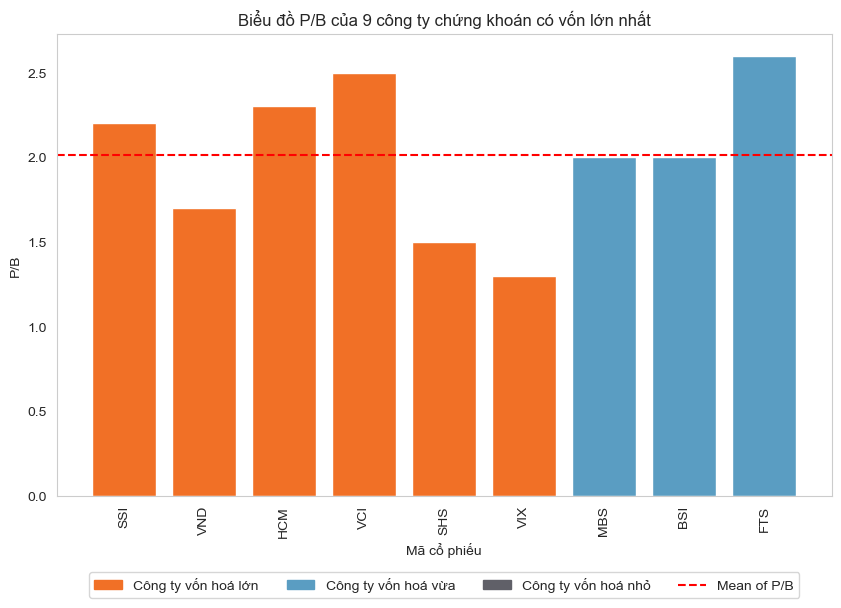

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(dfr_top9["Mã CP"], dfr_top9["P/B"], 
        label="P/B", color= dfr_top9['color'])
mean_pb_line = plt.axhline(y=dfr_top9["P/B"].mean(), color='r', linestyle='--', label="Mean of P/B")

plt.xlabel("Mã cổ phiếu", fontsize = 10)
plt.ylabel("P/B")
plt.title("Biểu đồ P/B của 9 công ty chứng khoán có vốn lớn nhất")
plt.xticks(rotation=90)
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch, gray_patch, mean_pb_line], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

output_file_path = 'bar_pb_top_9.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()


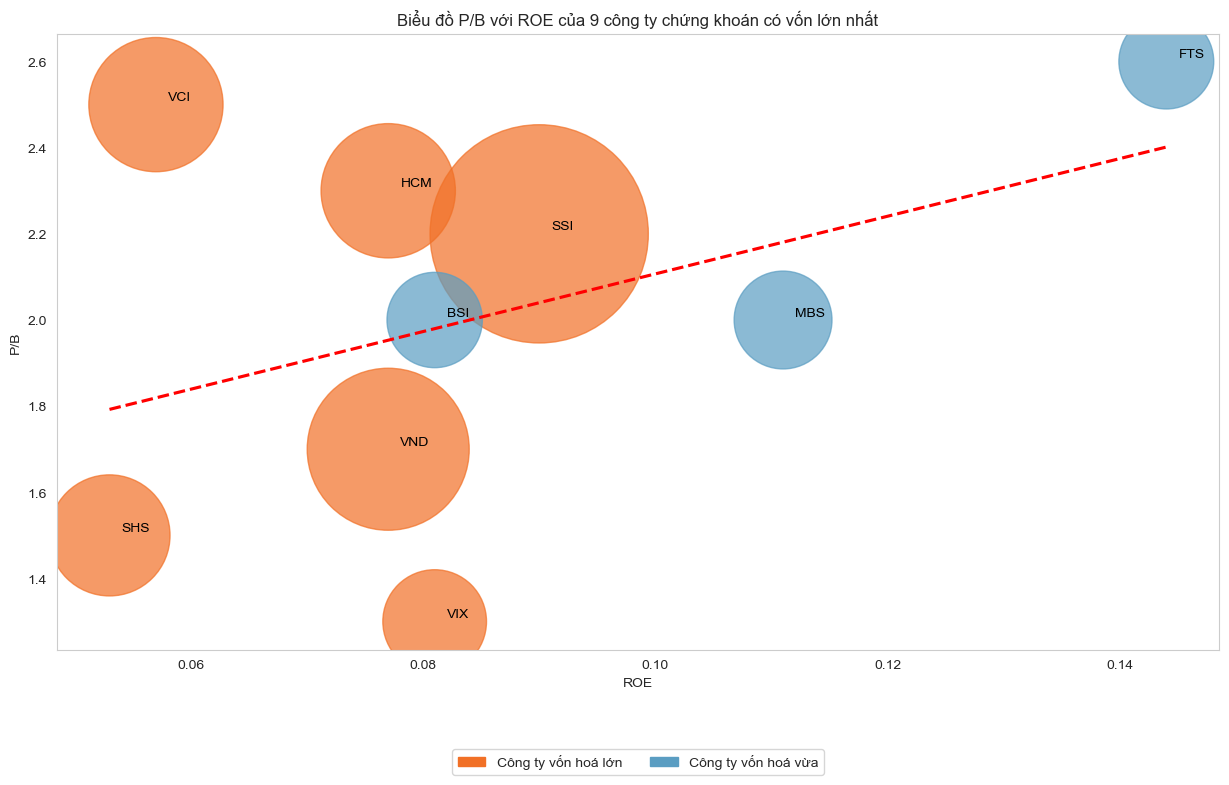

<Figure size 3840x2880 with 0 Axes>

In [23]:
from adjustText import adjust_text

# Scatter plot with regression line (without confidence interval), size by log(Market Cap)
plt.figure(figsize=(15, 8))

# Use plt.scatter to create the scatter plot with custom colors
plt.scatter(x=dfr_top9['ROE'], y=dfr_top9['P/B'], 
            s=dfr_top9['Vốn hóa (tỷ)']/2, alpha=0.7, 
            c=dfr_top9['color'])

# Use sns.regplot to add the regression line
sns.regplot(x='ROE', y='P/B', data=dfr_top9, 
            scatter=False, 
            line_kws={'color': 'red', 'linestyle': '--'}, ci=None)

texts = []
for index, row in dfr_top9.iterrows():
    texts.append(plt.text(row['ROE'] + 0.001, row['P/B'], row['Mã CP'],
                      horizontalalignment='left', size='medium', color='black'))

adjust_text(texts)

plt.xlabel('ROE')
plt.ylabel('P/B')
plt.title('Biểu đồ P/B với ROE của 9 công ty chứng khoán có vốn lớn nhất')
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

output_file_path = 'scatter_reg_pb_top_9.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=600)
plt.show()



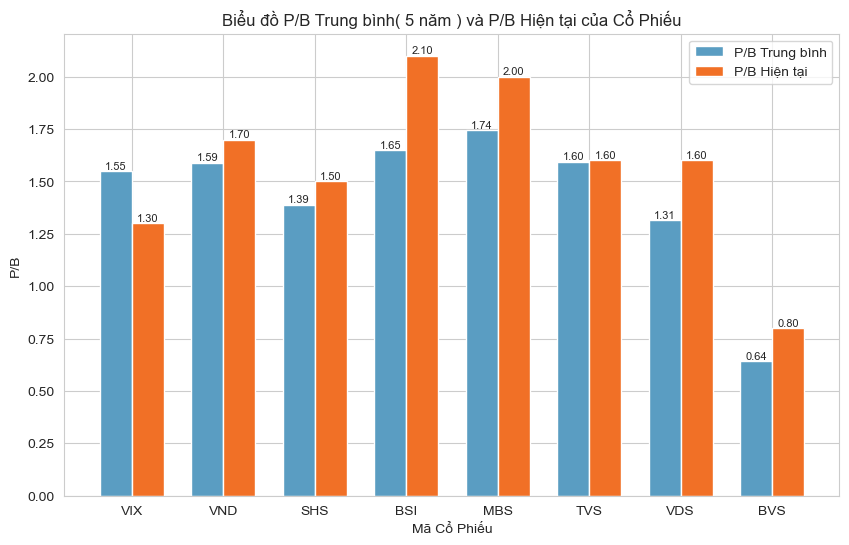

In [24]:
last_stock_list = ["VIX", "VND","SHS", "BSI", "MBS","TVS", "VDS", "BVS" ]

data_vix = vn.stock_evaluation (symbol='VIX', period=5, time_window='Y')
data_vnd = vn.stock_evaluation (symbol='VND', period=5, time_window='Y')
data_shs = vn.stock_evaluation (symbol='SHS', period=5, time_window='Y')
data_bsi = vn.stock_evaluation (symbol='BSI', period=5, time_window='Y')
data_mbs = vn.stock_evaluation (symbol='MBS', period=5, time_window='Y')
data_tvs = vn.stock_evaluation (symbol='TVS', period=5, time_window='Y')
data_vds = vn.stock_evaluation (symbol='VDS', period=5, time_window='Y')
data_bvs = vn.stock_evaluation (symbol='BVS', period=5, time_window='Y')

avg_pb_vix = data_vix['PB'].mean()
avg_pb_vnd = data_vnd['PB'].mean()
avg_pb_shs = data_shs['PB'].mean()
avg_pb_bsi = data_bsi['PB'].mean()
avg_pb_mbs = data_mbs['PB'].mean()
avg_pb_tvs = data_tvs['PB'].mean()
avg_pb_vds = data_vds['PB'].mean()
avg_pb_bvs = data_bvs['PB'].mean()



# Mã cổ phiếu và giá trị P/B tương ứng
avg_pbs = [avg_pb_vix, avg_pb_vnd, 
           avg_pb_shs, avg_pb_bsi, 
           avg_pb_mbs, avg_pb_tvs, 
           avg_pb_vds, avg_pb_bvs]
current_pbs = [ data_vix['PB'].iloc[-1], data_vnd['PB'].iloc[-1], 
               data_shs['PB'].iloc[-1], data_bsi['PB'].iloc[-1],
               data_mbs['PB'].iloc[-1], data_tvs['PB'].iloc[-1],
               data_vds['PB'].iloc[-1], data_bvs['PB'].iloc[-1]]

# Số lượng mã cổ phiếu
num_stocks = len(last_stock_list)

# Vị trí của mỗi mã cổ phiếu trên biểu đồ
x = range(num_stocks)

# Độ rộng của các cột
width = 0.35

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ cột cho P/B trung bình
avg_bar = ax.bar(x, avg_pbs, width, label='P/B Trung bình', color='#5A9DC2')

# Vị trí cho cột P/B hiện tại
current_x = [i + width for i in x]

# Vẽ cột cho P/B hiện tại
current_bar = ax.bar(current_x, current_pbs, 
                     width, label='P/B Hiện tại', 
                     color='#F17026')

# Đặt tên cho các cột
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(last_stock_list)
ax.set_xlabel('Mã Cổ Phiếu')
ax.set_ylabel('P/B')
ax.set_title('Biểu đồ P/B Trung bình( 5 năm ) và P/B Hiện tại của Cổ Phiếu')
ax.legend()

# Hiển thị giá trị trên các cột
for bar in avg_bar + current_bar:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)

output_file_path = 'pb_mean_pb_5_year.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()


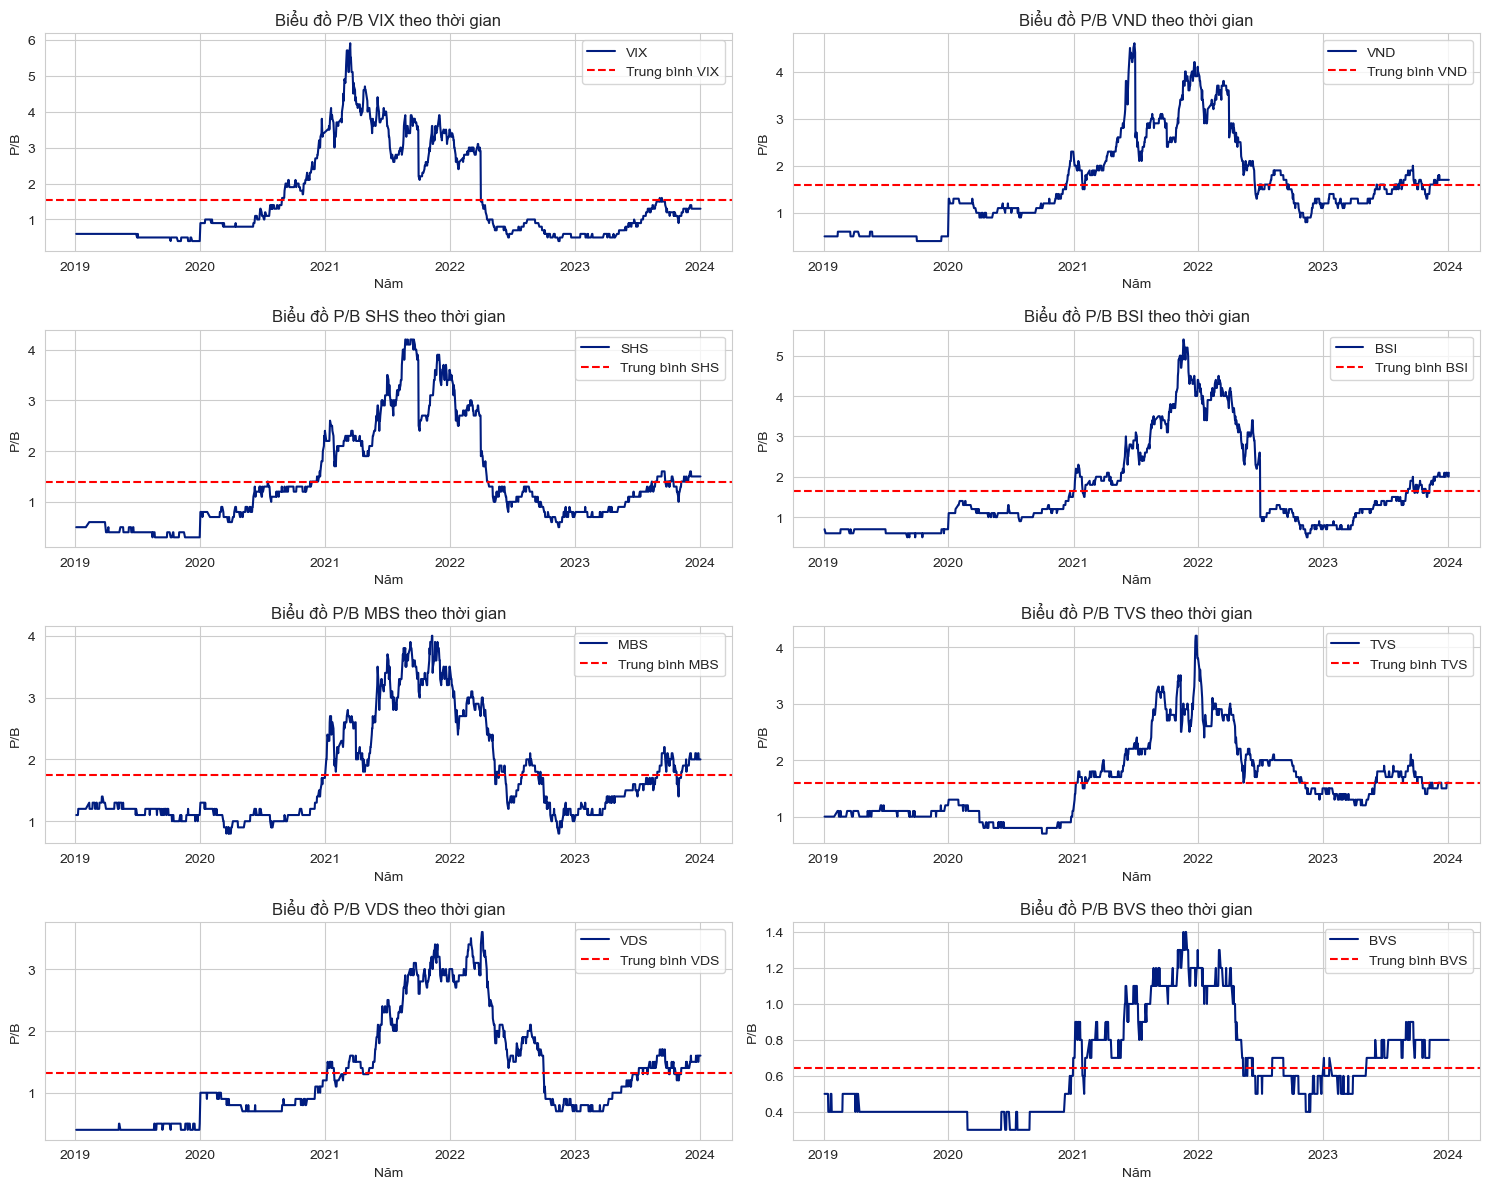

<Figure size 5120x3840 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

# Tạo một lưới 2x2 cho biểu đồ
fig, axs = plt.subplots(4, 2, figsize=(15, 12))

# Mã cổ phiếu và dữ liệu P/B tương ứng
pb_data = [data_vix, data_vnd, 
           data_shs, data_bsi,
           data_mbs, data_tvs,
           data_vds, data_bvs]
avg_pbs = [avg_pb_vix, avg_pb_vnd, 
           avg_pb_shs, avg_pb_bsi, 
           avg_pb_mbs, avg_pb_tvs, 
           avg_pb_vds, avg_pb_bvs]

# Vẽ biểu đồ cho từng mã cổ phiếu
for i in range(8):
    row, col = divmod(i, 2)  # Xác định vị trí hàng và cột trong lưới
    ax = axs[row, col]  # Lấy ô tại vị trí đó
    stock = last_stock_list[i]
    data = pb_data[i]
    avg_pb = avg_pbs[i]
    
    ax.plot(data['fromDate'], data['PB'], label=stock)  # Biểu đồ line P/B
    ax.axhline(y=avg_pb, color='r', linestyle='--', label=f"Trung bình {stock}")  # Đường trung bình
    ax.set_xlabel("Năm")
    ax.set_ylabel("P/B")
    ax.set_title(f"Biểu đồ P/B {stock} theo thời gian")
    ax.legend()

# Tạo khoảng trống cho tiêu đề chung của lưới
plt.tight_layout()

output_file_path = 'pb_mean_pb_5_year_lineplot.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)
plt.show()


In [26]:
last_stock_list = ['VND', 'VIX', 'SHS', 'TVS']

In [27]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

for stock in last_stock_list:
    # Tạo DataFrame cho cổ phiếu và đặt cột "time" làm index
    stock_data = vn.stock_historical_data(stock, start, end, resolution='1D', type='stock')
    stock_data = stock_data.set_index("time")
    
    # Lưu DataFrame vào biến globals()
    globals()[stock] = stock_data


company_list = [VND, VIX, SHS, TVS]
company_name = ["Chứng khoán VnDirect", "Chứng khoán Vietstock", 
                "Chứng khoán SG - HN", "Chứng khoán Thiên Việt" ]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    





In [28]:
df = pd.concat(company_list, axis=0)
#df.time = pd.to_datetime(df.time)
#df = df.set_index("time")
df.tail(10)


open   high    low  close  volume ticker            company_name
time                                                                         
2023-12-21  20200  20200  19900  19900   67100    TVS  Chứng khoán Thiên Việt
2023-12-22  20000  20100  19900  19900   16600    TVS  Chứng khoán Thiên Việt
2023-12-25  20000  20300  19900  20200   22900    TVS  Chứng khoán Thiên Việt
2023-12-26  20200  20250  20000  20200   37500    TVS  Chứng khoán Thiên Việt
2023-12-27  20200  20500  20100  20300   35700    TVS  Chứng khoán Thiên Việt
2023-12-28  20300  21100  20300  21000  150700    TVS  Chứng khoán Thiên Việt
2023-12-29  20900  21850  20900  21100   70300    TVS  Chứng khoán Thiên Việt
2024-01-02  21100  21200  21050  21100   31200    TVS  Chứng khoán Thiên Việt
2024-01-03  21100  21200  20950  21200   25600    TVS  Chứng khoán Thiên Việt
2024-01-04  21450  21850  21400  21500   89300    TVS  Chứng khoán Thiên Việt

In [29]:
pd.set_option('display.float_format', '{:.2f}'.format)
VND.describe()

open     high      low    close       volume
count   251.00   251.00   251.00   251.00       251.00
mean  18472.91 18817.92 18117.33 18440.04  26241221.51
std    3075.70  3130.15  3017.50  3073.91  12884313.14
min   13400.00 13800.00 13100.00 13400.00   6799000.00
25%   15325.00 15625.00 15150.00 15300.00  17544750.00
50%   18800.00 19150.00 18350.00 18800.00  24334100.00
75%   21050.00 21450.00 20575.00 21000.00  31235650.00
max   25200.00 25600.00 24700.00 25250.00 105878000.00

In [30]:
VIX.describe()

open     high      low    close      volume
count   251.00   251.00   251.00   251.00      251.00
mean  11975.93 12227.12 11692.46 11971.71 22747505.16
std    4679.16  4766.19  4530.47  4664.94 13990089.40
min    5740.00  5860.00  5680.00  5710.00  2264300.00
25%    6830.00  6960.00  6705.00  6805.00 12665050.00
50%   11650.00 11800.00 11450.00 11600.00 19726000.00
75%   16400.00 16800.00 16000.00 16400.00 31375450.00
max   20600.00 20750.00 19750.00 20600.00 73885104.00

In [31]:
SHS.describe()

open     high      low    close      volume
count   251.00   251.00   251.00   251.00      251.00
mean  13642.63 14039.44 13370.12 13724.70 21218009.15
std    3802.91  3906.30  3715.43  3823.60 10364773.33
min    7500.00  8300.00  7500.00  8000.00  3768100.00
25%    9850.00 10200.00  9600.00  9850.00 14398400.00
50%   13900.00 14200.00 13700.00 13900.00 19218600.00
75%   17300.00 17800.00 16850.00 17400.00 25560250.00
max   20600.00 20700.00 19800.00 20500.00 69713696.00

In [32]:
TVS.describe()

open     high      low    close    volume
count   251.00   251.00   251.00   251.00    251.00
mean  20308.98 20597.90 19891.57 20211.32  69758.96
std    3176.12  3220.57  3111.72  3151.49  80877.99
min   15300.00 15580.00 15080.00 15080.00    200.00
25%   16960.00 17260.00 16590.00 16790.00  12750.00
50%   20500.00 20780.00 20100.00 20420.00  40600.00
75%   23125.00 23500.00 22775.00 23050.00  94300.00
max   28000.00 28400.00 27000.00 27600.00 488900.00

In [33]:
VIX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2023-01-04 to 2024-01-04
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   open          251 non-null    int32 
 1   high          251 non-null    int32 
 2   low           251 non-null    int32 
 3   close         251 non-null    int32 
 4   volume        251 non-null    int64 
 5   ticker        251 non-null    object
 6   company_name  251 non-null    object
dtypes: int32(4), int64(1), object(2)
memory usage: 11.8+ KB


## Closing Price

<Figure size 5120x3840 with 0 Axes>

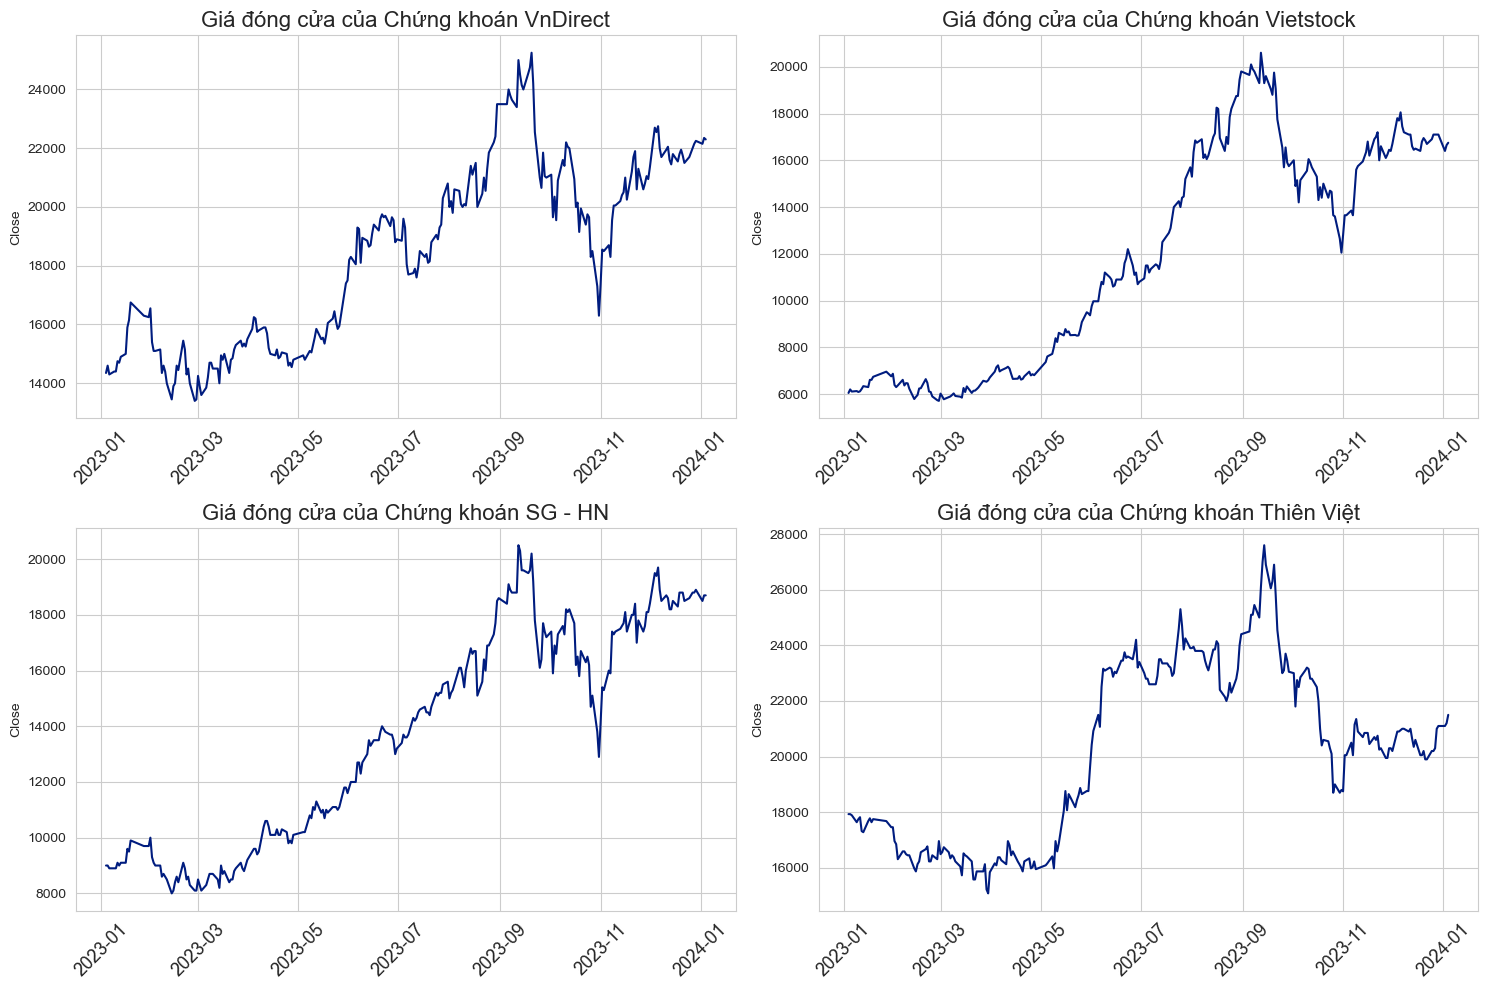

<Figure size 5120x3840 with 0 Axes>

In [35]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")
%matplotlib inline
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    ax = plt.plot(company['close'] )
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.xticks(rotation = 45, fontsize=13)
    plt.title(f"Giá đóng cửa của {company_name[i - 1]}",
             fontsize=16)
    
plt.tight_layout()
output_file_path = 'Closing_price.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

## Volume of Sales

<Figure size 5120x3840 with 0 Axes>

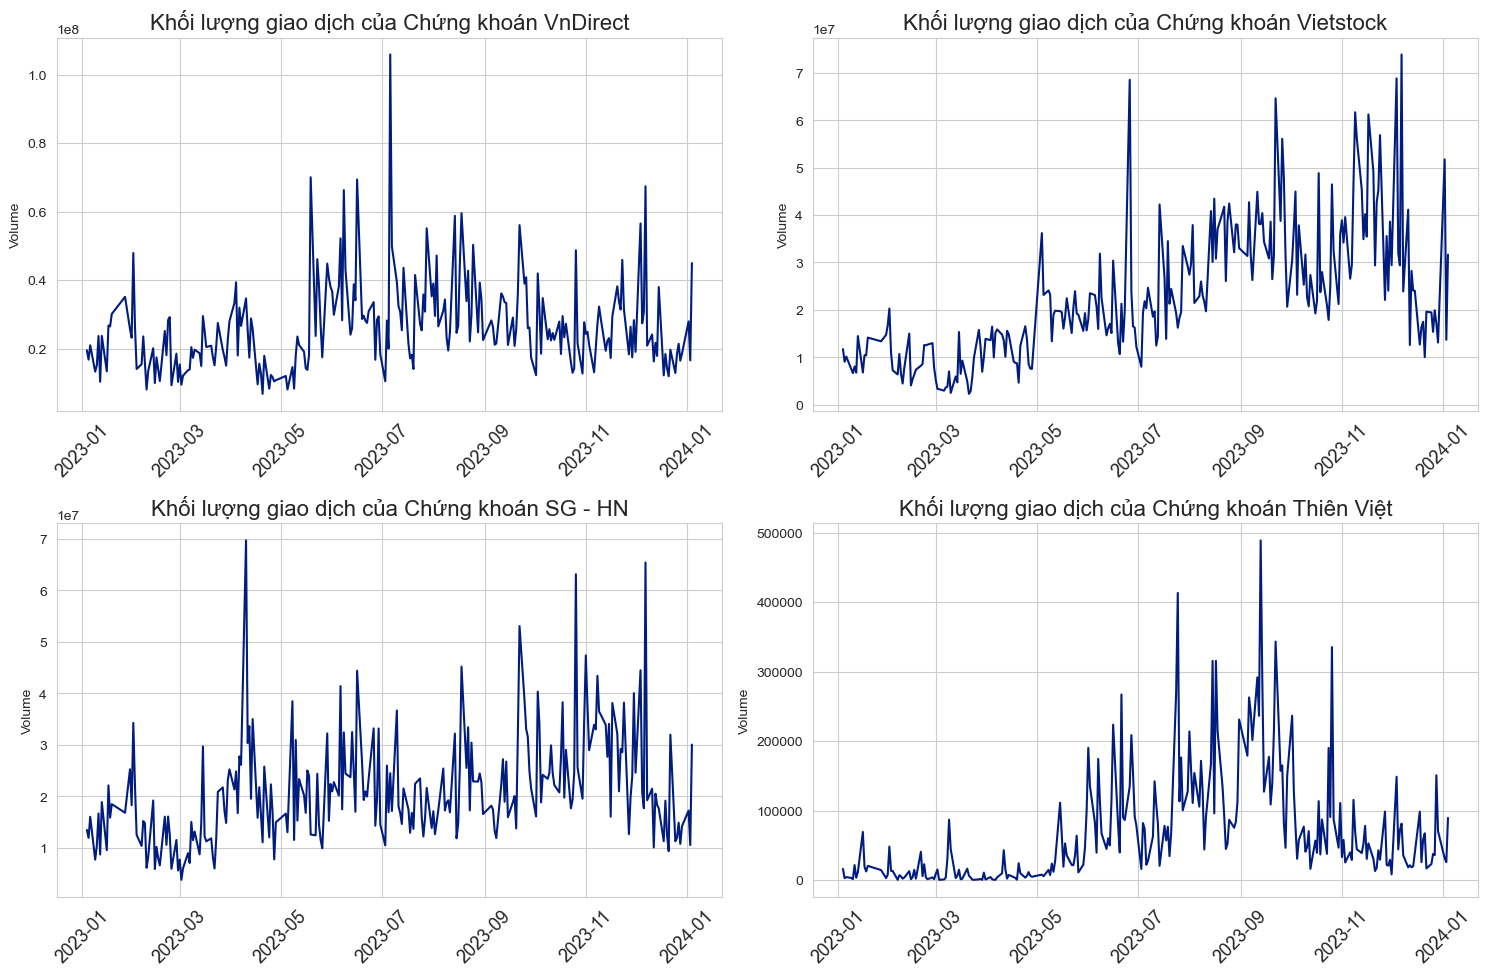

<Figure size 5120x3840 with 0 Axes>

In [36]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")
%matplotlib inline
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    ax = plt.plot(company['volume'] )
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.xticks(rotation = 45, fontsize=13)
    plt.title(f"Khối lượng giao dịch của {company_name[i - 1]}",
             fontsize =16)
    
plt.tight_layout()
output_file_path = 'Volume.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

## Moving average

<Figure size 5120x3840 with 0 Axes>

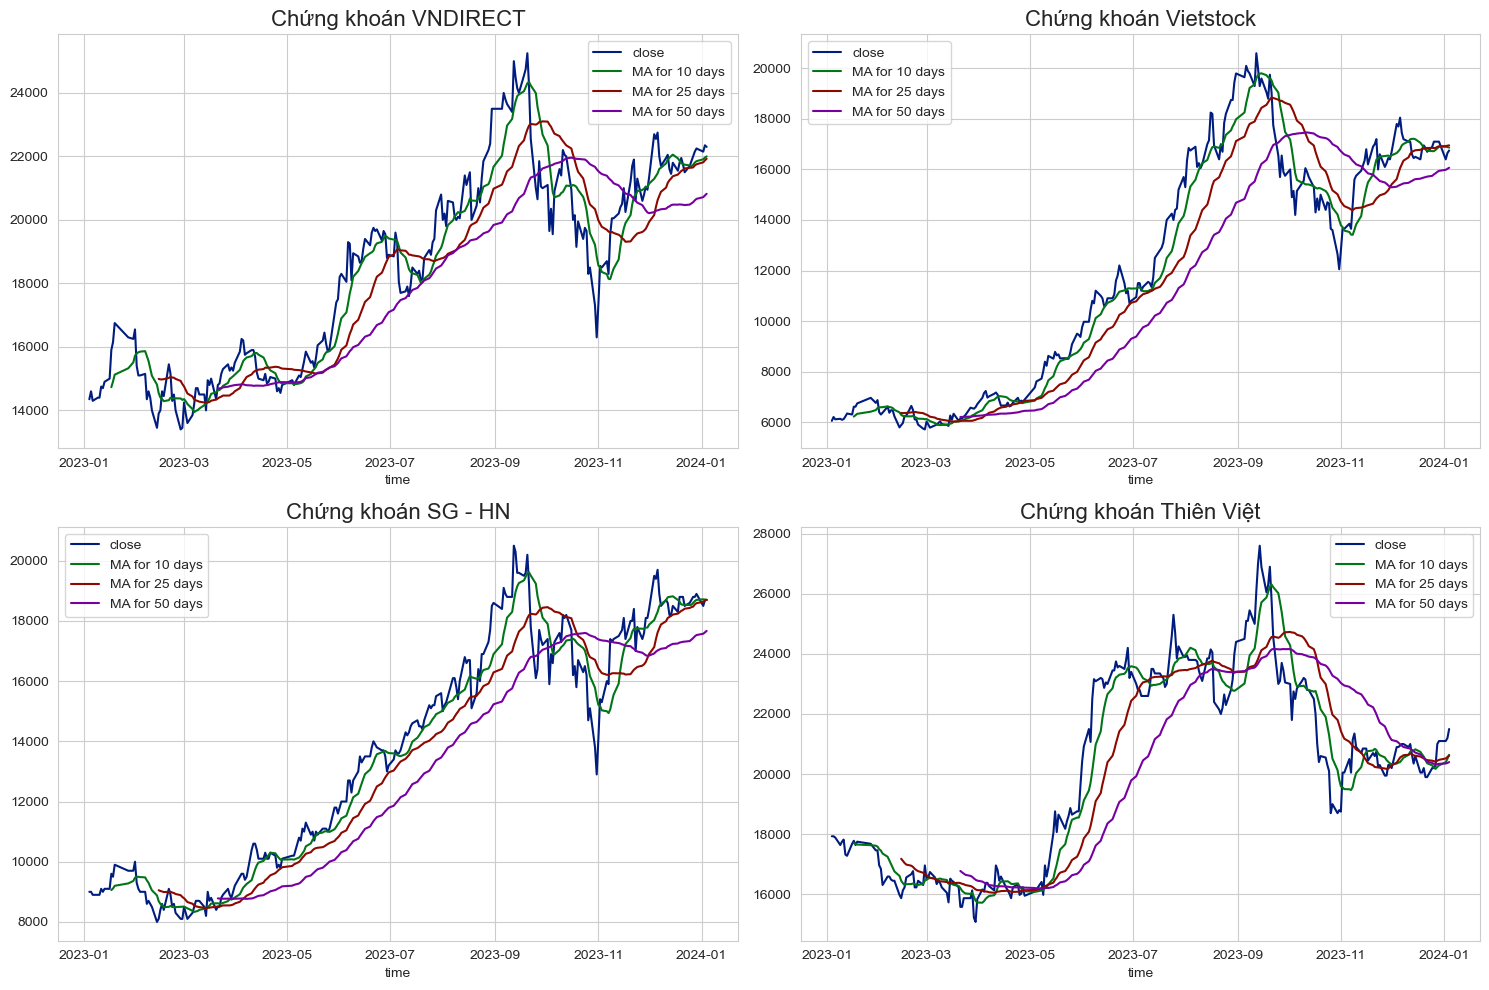

<Figure size 5120x3840 with 0 Axes>

In [37]:
ma_day = [10, 25, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

VND[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Chứng khoán VNDIRECT', fontsize = 16)

VIX[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Chứng khoán Vietstock', fontsize = 16)

SHS[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Chứng khoán SG - HN', fontsize = 16)

TVS[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Chứng khoán Thiên Việt', fontsize = 16)

fig.tight_layout()
output_file_path = 'MA.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

## The daily return of the stock on average

<Figure size 5120x3840 with 0 Axes>

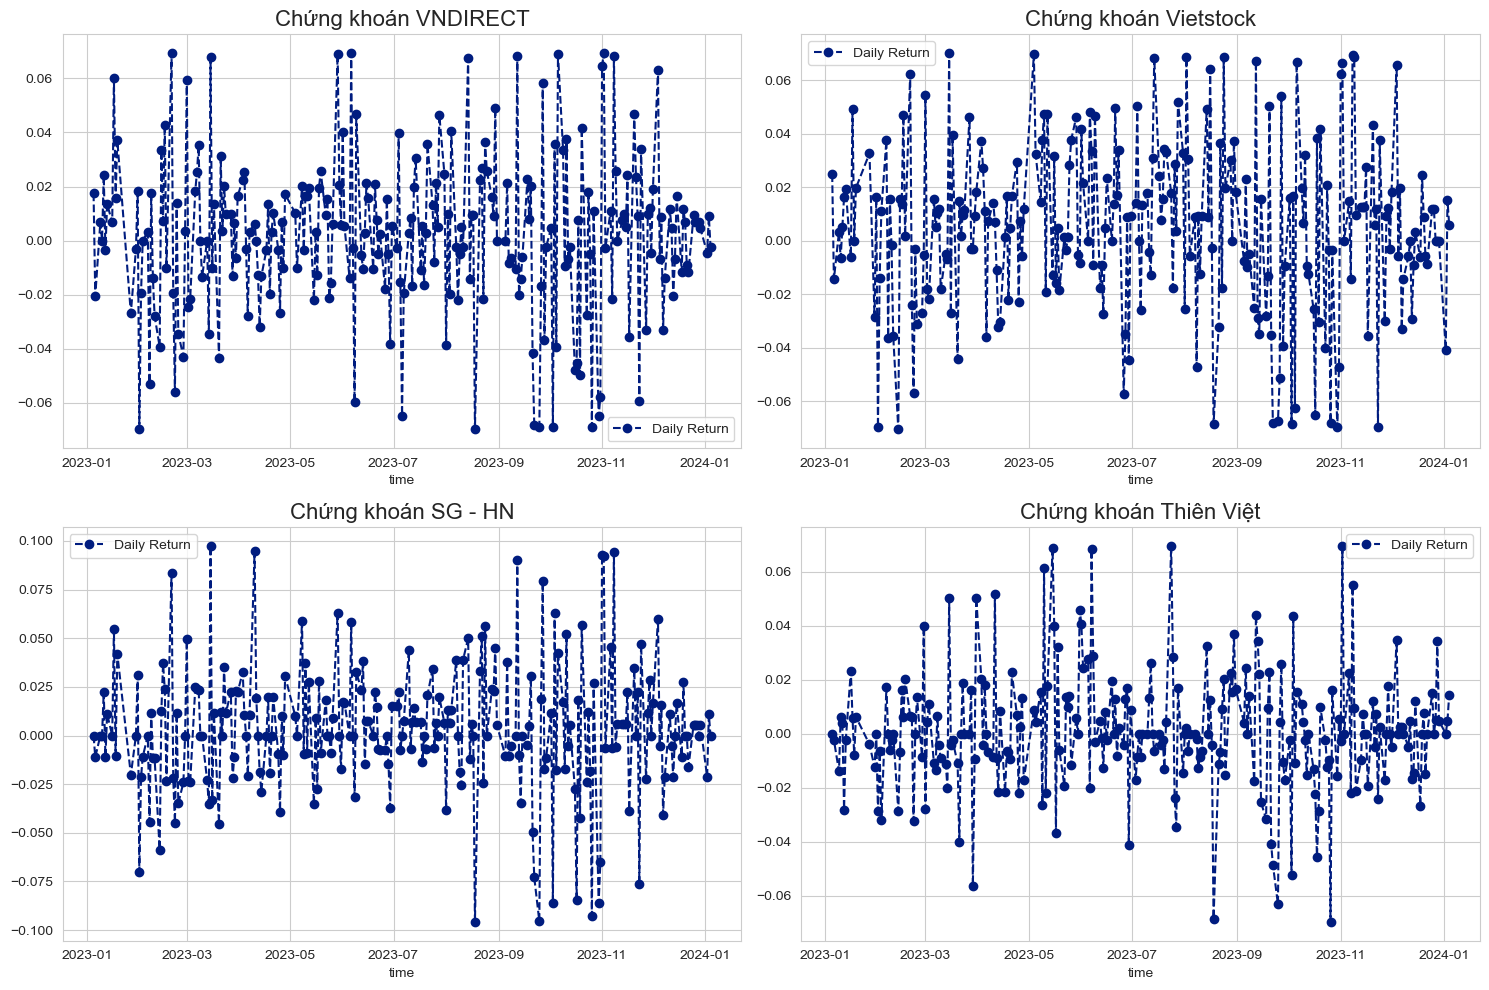

<Figure size 5120x3840 with 0 Axes>

In [38]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

VND['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Chứng khoán VNDIRECT', fontsize = 16)

VIX['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Chứng khoán Vietstock', fontsize = 16)

SHS['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Chứng khoán SG - HN', fontsize = 16)

TVS['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Chứng khoán Thiên Việt', fontsize = 16)

fig.tight_layout()
output_file_path = 'return.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

<Figure size 5120x3840 with 0 Axes>

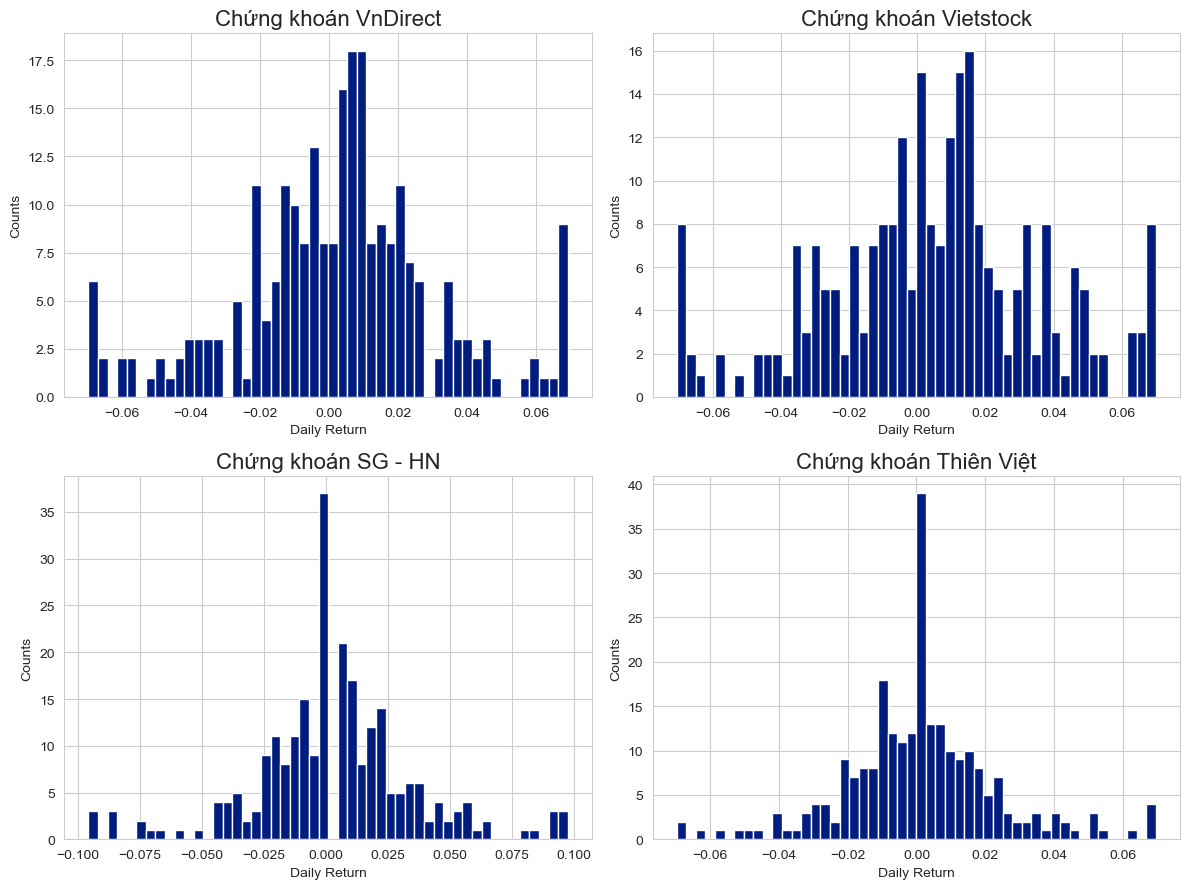

<Figure size 5120x3840 with 0 Axes>

In [39]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}', 
             fontsize = 16)
    
plt.tight_layout()
output_file_path = 'dist_return.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

## The correlation between different stocks closing prices

In [40]:
df

open   high    low  close    volume ticker  \
time                                                      
2023-01-04  14700  14950  14350  14350  19515200    VND   
2023-01-05  14500  14750  14100  14600  16800700    VND   
2023-01-06  14400  14900  14300  14300  20985300    VND   
2023-01-09  14550  14650  14300  14400  13304800    VND   
2023-01-10  14400  14700  14050  14400  15185200    VND   
...           ...    ...    ...    ...       ...    ...   
2023-12-28  20300  21100  20300  21000    150700    TVS   
2023-12-29  20900  21850  20900  21100     70300    TVS   
2024-01-02  21100  21200  21050  21100     31200    TVS   
2024-01-03  21100  21200  20950  21200     25600    TVS   
2024-01-04  21450  21850  21400  21500     89300    TVS   

                      company_name  
time                                
2023-01-04    Chứng khoán VnDirect  
2023-01-05    Chứng khoán VnDirect  
2023-01-06    Chứng khoán VnDirect  
2023-01-09    Chứng khoán VnDirect  
2023-01-10    Chứng khoán VnDirect  
...                            ...  
2023-12-28  Chứng khoán Thiên Việt  
2023-12-29  Chứng khoán Thiên Việt  
2024-01-02  Chứng khoán Thiên Việt  
2024-01-03  Chứng khoán Thiên Việt  
2024-01-04  Chứng khoán Thiên Việt  

[1004 rows x 7 columns]

In [41]:
df2 = df.reset_index()
df2

time   open   high    low  close    volume ticker  \
0     2023-01-04  14700  14950  14350  14350  19515200    VND   
1     2023-01-05  14500  14750  14100  14600  16800700    VND   
2     2023-01-06  14400  14900  14300  14300  20985300    VND   
3     2023-01-09  14550  14650  14300  14400  13304800    VND   
4     2023-01-10  14400  14700  14050  14400  15185200    VND   
...          ...    ...    ...    ...    ...       ...    ...   
999   2023-12-28  20300  21100  20300  21000    150700    TVS   
1000  2023-12-29  20900  21850  20900  21100     70300    TVS   
1001  2024-01-02  21100  21200  21050  21100     31200    TVS   
1002  2024-01-03  21100  21200  20950  21200     25600    TVS   
1003  2024-01-04  21450  21850  21400  21500     89300    TVS   

                company_name  
0       Chứng khoán VnDirect  
1       Chứng khoán VnDirect  
2       Chứng khoán VnDirect  
3       Chứng khoán VnDirect  
4       Chứng khoán VnDirect  
...                      ...  
999   Chứng khoán Thiên Việt  
1000  Chứng khoán Thiên Việt  
1001  Chứng khoán Thiên Việt  
1002  Chứng khoán Thiên Việt  
1003  Chứng khoán Thiên Việt  

[1004 rows x 8 columns]

In [44]:
# Tạo DataFrame cho từng ticker
df_VND = df2[df2['ticker'] == 'VND'][['time', 'close']].set_index('time').rename(columns={'close': 'VND'})
df_VIX = df2[df2['ticker'] == 'VIX'][['time', 'close']].set_index('time').rename(columns={'close': 'VIX'})
df_SHS = df2[df2['ticker'] == 'SHS'][['time', 'close']].set_index('time').rename(columns={'close': 'SHS'})
df_TVS = df2[df2['ticker'] == 'TVS'][['time', 'close']].set_index('time').rename(columns={'close': 'TVS'})
df_vnindex = vn.stock_historical_data("VNINDEX", start, end, "1D", "index")
df_vnindex = df_vnindex[['time', 'close']].set_index('time').rename(columns={'close': 'VNINDEX'})

df_VND = df_VND.loc[~df_VND.index.duplicated(keep='first')]
df_VIX = df_VIX.loc[~df_VIX.index.duplicated(keep='first')]
df_SHS = df_SHS.loc[~df_SHS.index.duplicated(keep='first')]
df_TVS = df_TVS.loc[~df_TVS.index.duplicated(keep='first')]

# Kết hợp các DataFrame theo cột 'time'
closing_df = pd.concat([df_VND, df_VIX, df_SHS, df_TVS, df_vnindex], axis=1)

# Hiển thị DataFrame mới
closing_df


VND    VIX    SHS    TVS    VNINDEX
time                                             
2023-01-04  14350   6050   9000  17930 1046349.00
2023-01-05  14600   6200   9000  17930 1055820.00
2023-01-06  14300   6110   8900  17890 1051440.00
2023-01-09  14400   6130   8900  17640 1054210.00
2023-01-10  14400   6090   8900  17750 1053350.00
...           ...    ...    ...    ...        ...
2023-12-28  22150  17100  18800  21000 1128930.00
2023-12-29  22250  17100  18900  21100 1129930.00
2024-01-02  22150  16400  18500  21100 1131720.00
2024-01-03  22350  16650  18700  21200 1144170.00
2024-01-04  22300  16750  18700  21500 1150720.00

[251 rows x 5 columns]

In [45]:
stock_rets = closing_df.pct_change()
stock_rets

VND   VIX   SHS   TVS  VNINDEX
time                                       
2023-01-04   NaN   NaN   NaN   NaN      NaN
2023-01-05  0.02  0.02  0.00  0.00     0.01
2023-01-06 -0.02 -0.01 -0.01 -0.00    -0.00
2023-01-09  0.01  0.00  0.00 -0.01     0.00
2023-01-10  0.00 -0.01  0.00  0.01    -0.00
...          ...   ...   ...   ...      ...
2023-12-28  0.01  0.00  0.00  0.03     0.01
2023-12-29  0.00  0.00  0.01  0.00     0.00
2024-01-02 -0.00 -0.04 -0.02  0.00     0.00
2024-01-03  0.01  0.02  0.01  0.00     0.01
2024-01-04 -0.00  0.01  0.00  0.01     0.01

[251 rows x 5 columns]

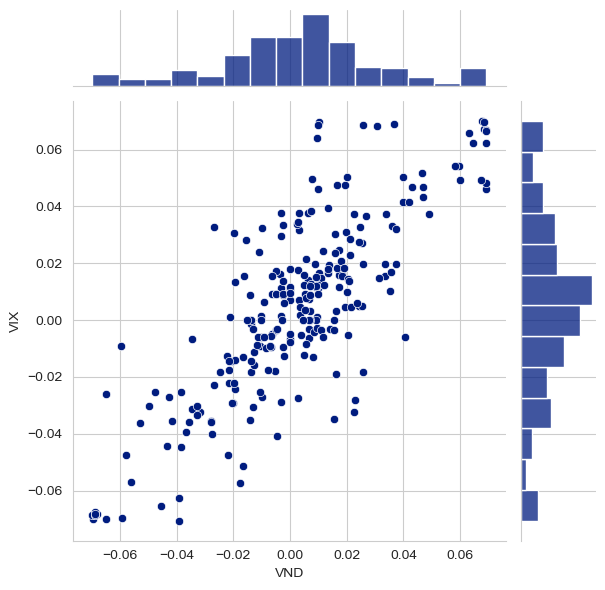

In [46]:
sns.jointplot(x='VND', y='VIX', data=stock_rets.reset_index(), kind='scatter')

<Figure size 12800x9600 with 0 Axes>

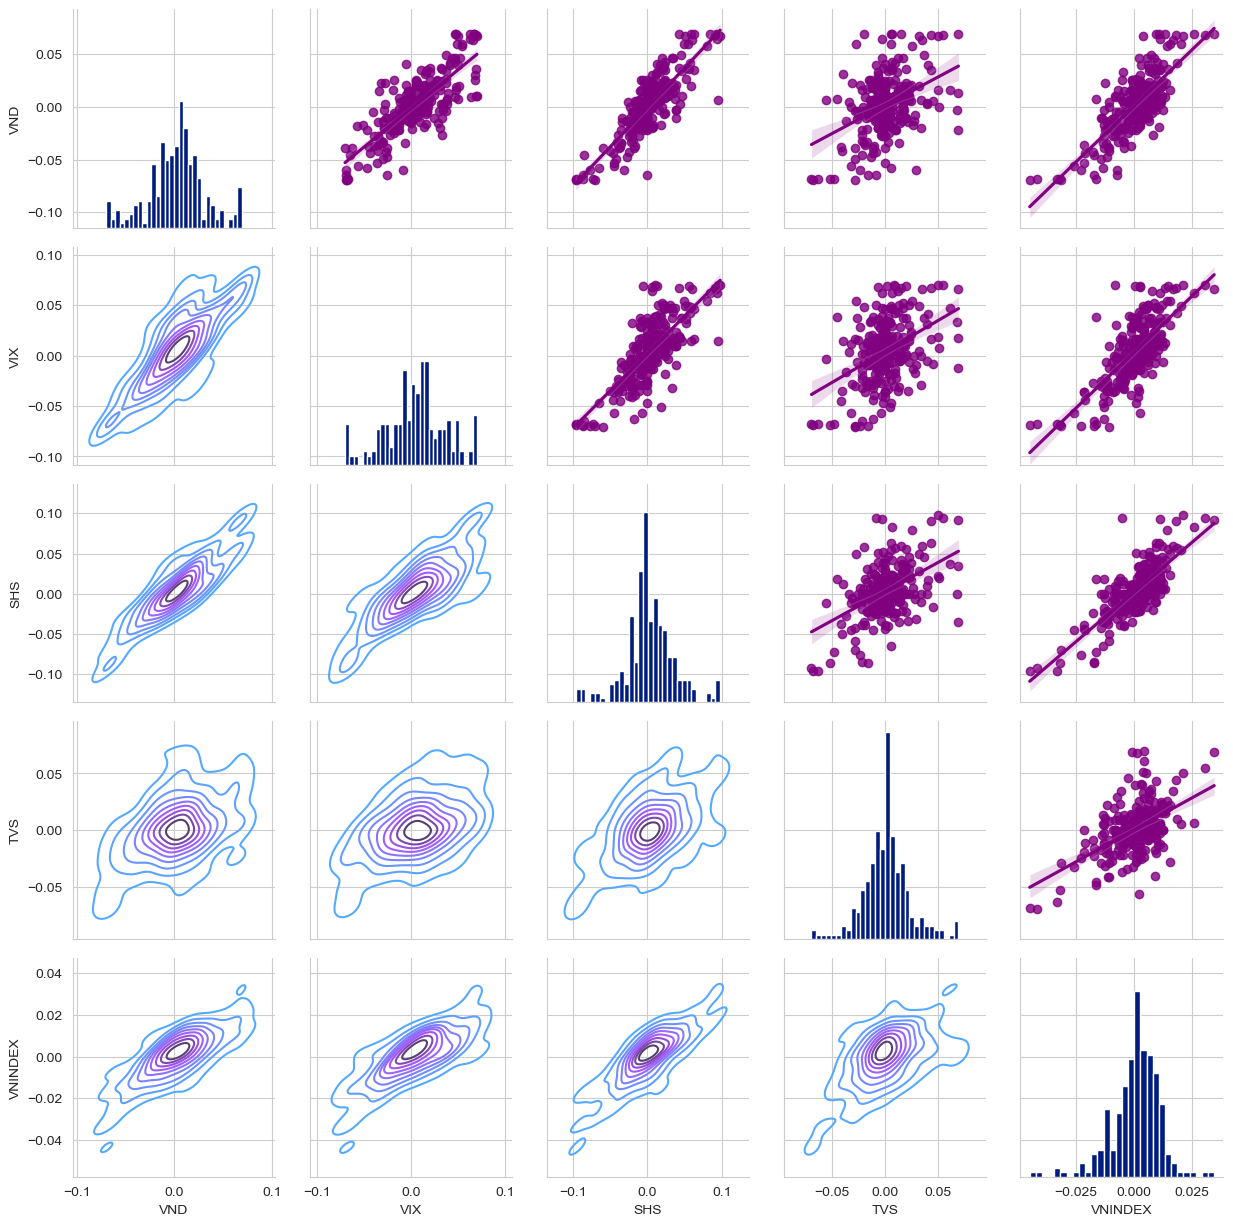

<Figure size 12800x9600 with 0 Axes>

In [47]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_rets.reset_index().dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)
output_file_path = 'corr_return.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

<Figure size 12800x9600 with 0 Axes>

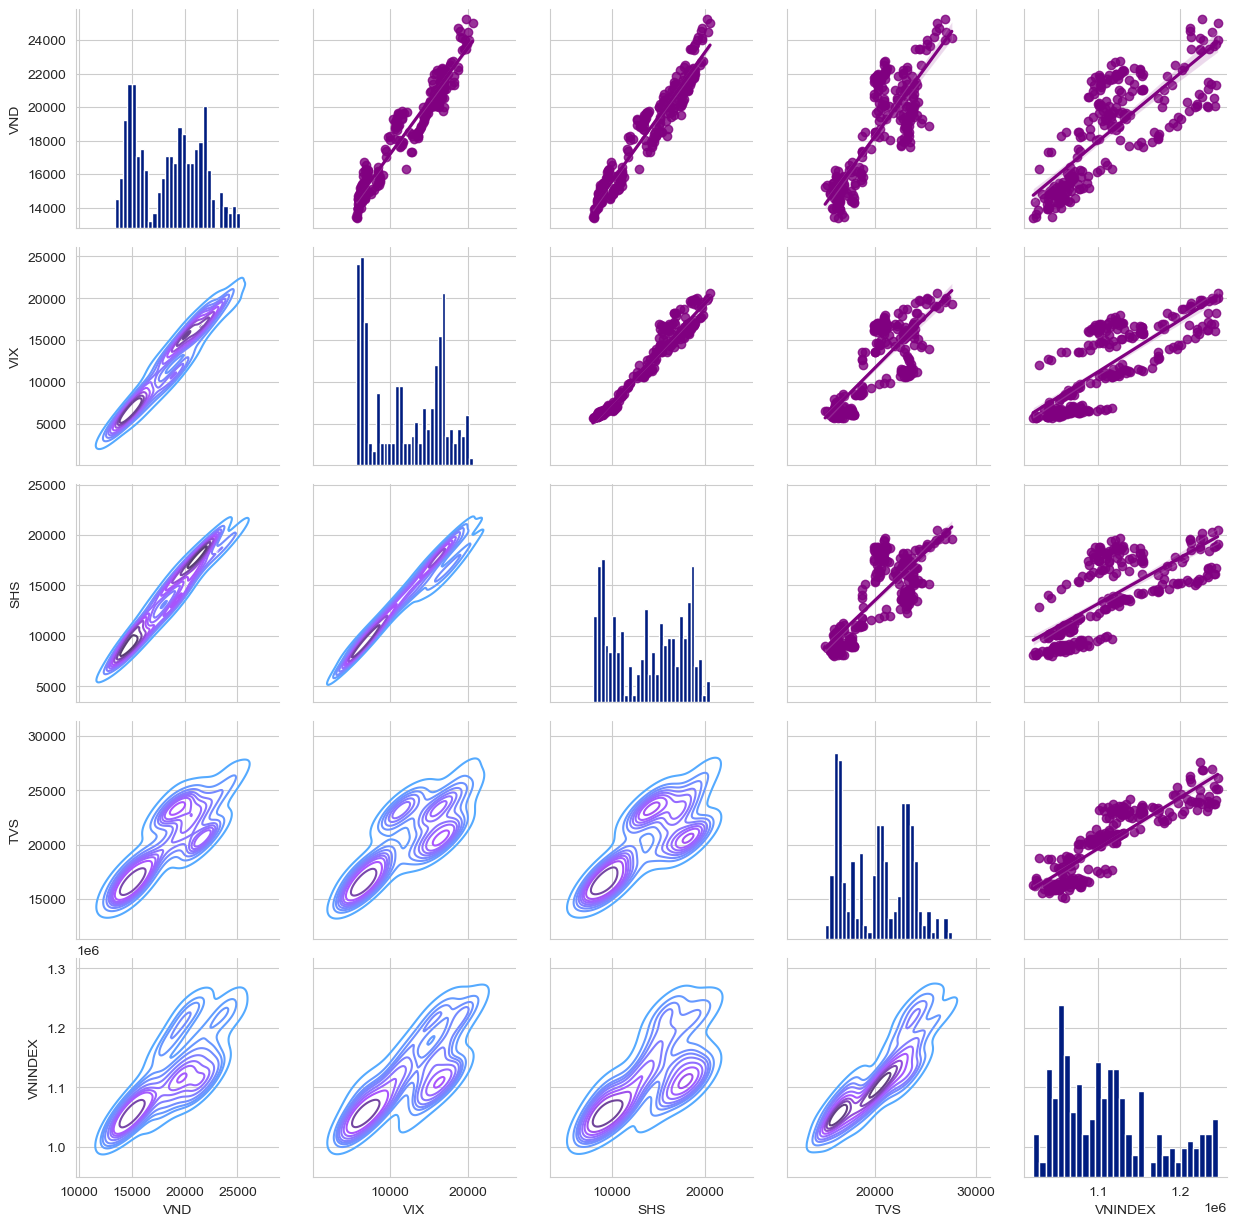

<Figure size 12800x9600 with 0 Axes>

In [48]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(closing_df.reset_index())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)
output_file_path = 'corr_closing.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

<Figure size 12800x9600 with 0 Axes>

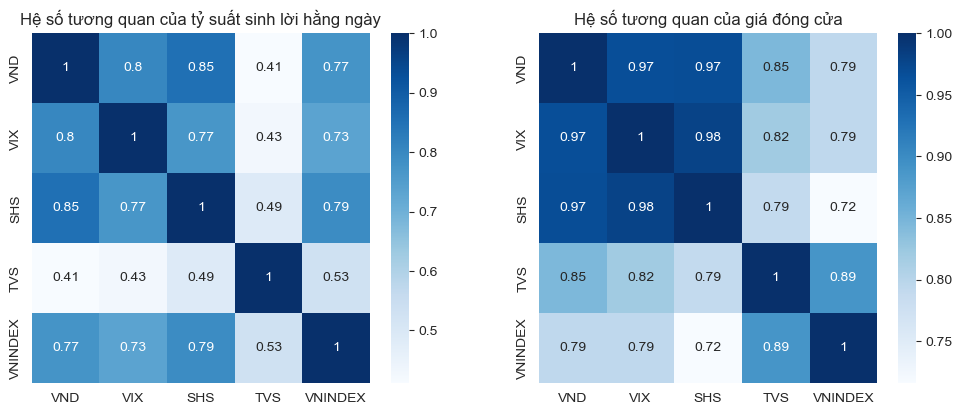

<Figure size 12800x9600 with 0 Axes>

In [49]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(stock_rets.corr(), annot=True, cmap='Blues')
plt.title('Hệ số tương quan của tỷ suất sinh lời hằng ngày')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='Blues')
plt.title('Hệ số tương quan của giá đóng cửa')
output_file_path = 'corr_return_close.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

<Figure size 12800x9600 with 0 Axes>

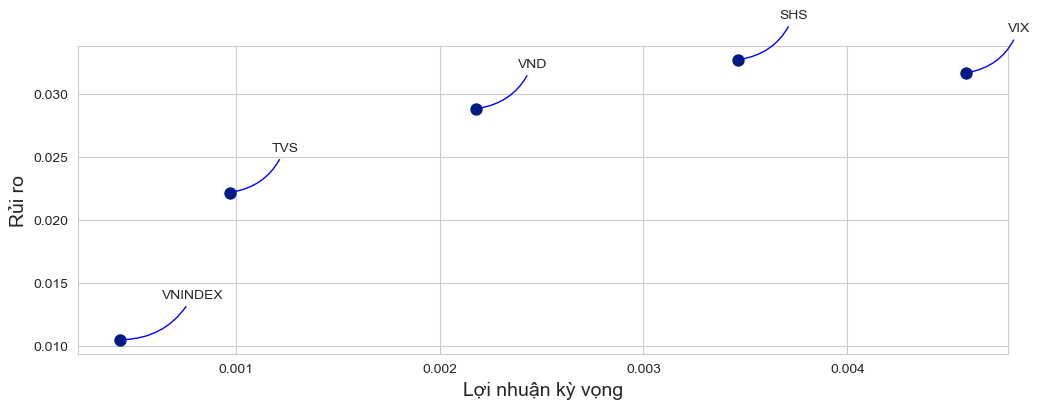

<Figure size 12800x9600 with 0 Axes>

In [50]:
rets = stock_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(12, 4))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Lợi nhuận kỳ vọng', fontsize = 14)
plt.ylabel('Rủi ro', fontsize = 14)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(30, 30), 
                 textcoords='offset points', 
                 arrowprops=dict(arrowstyle='-', 
                                 color='blue', 
                                 connectionstyle='arc3,rad=-0.3')
                )
output_file_path = 'return_mean_std.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

In [51]:
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

data = vn.stock_historical_data('VIX', start, end, resolution='1D',
                                type='stock').set_index("time")
data.head()


open  high   low  close  volume ticker
time                                              
2014-01-06  1370  1370  1350   1350    1300    VIX
2014-01-07  1350  1350  1350   1350     900    VIX
2014-01-08  1350  1350  1350   1350       0    VIX
2014-01-09  1430  1430  1430   1430    1400    VIX
2014-01-10  1430  1430  1430   1430       0    VIX

In [52]:
# Drop duplicate indices

data = data.loc[~data.index.duplicated(keep='first')]  

# Set the frequency to daily and forward fill missing values

data = data.asfreq('D', method='ffill')

data.close

time
2014-01-06     1350
2014-01-07     1350
2014-01-08     1350
2014-01-09     1430
2014-01-10     1430
              ...  
2023-12-31    17100
2024-01-01    17100
2024-01-02    16400
2024-01-03    16650
2024-01-04    16750
Freq: D, Name: close, Length: 3651, dtype: int32

In [53]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [54]:
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-dark-palette')

<Figure size 640x480 with 0 Axes>

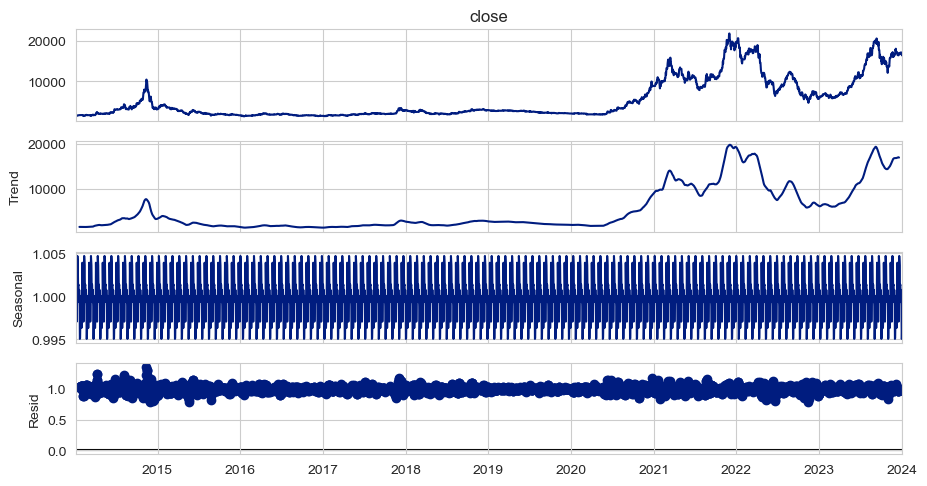

<Figure size 5120x3840 with 0 Axes>

In [55]:
# Checking decomposition of trend, seasonality and residue of the original time series.
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(data['close'], 
                                       model='multiplicative', 
                                       period=30)

fig = plt.figure()  
fig = decomposition.plot()
plt.figure(dpi=800)
fig.set_size_inches(10, 5)

plt.show()  # Display the plot


output_file_path = 'seasonal_decompose.png'
fig.savefig(output_file_path, format='png', bbox_inches='tight')

plt.close(fig)  # Close the plot


ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -1.299555
p-value: 0.629376
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 5.393081
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Admin\AppData\Local\Temp\ipykernel_11688\1497342823.py:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)


<Figure size 2400x600 with 0 Axes>

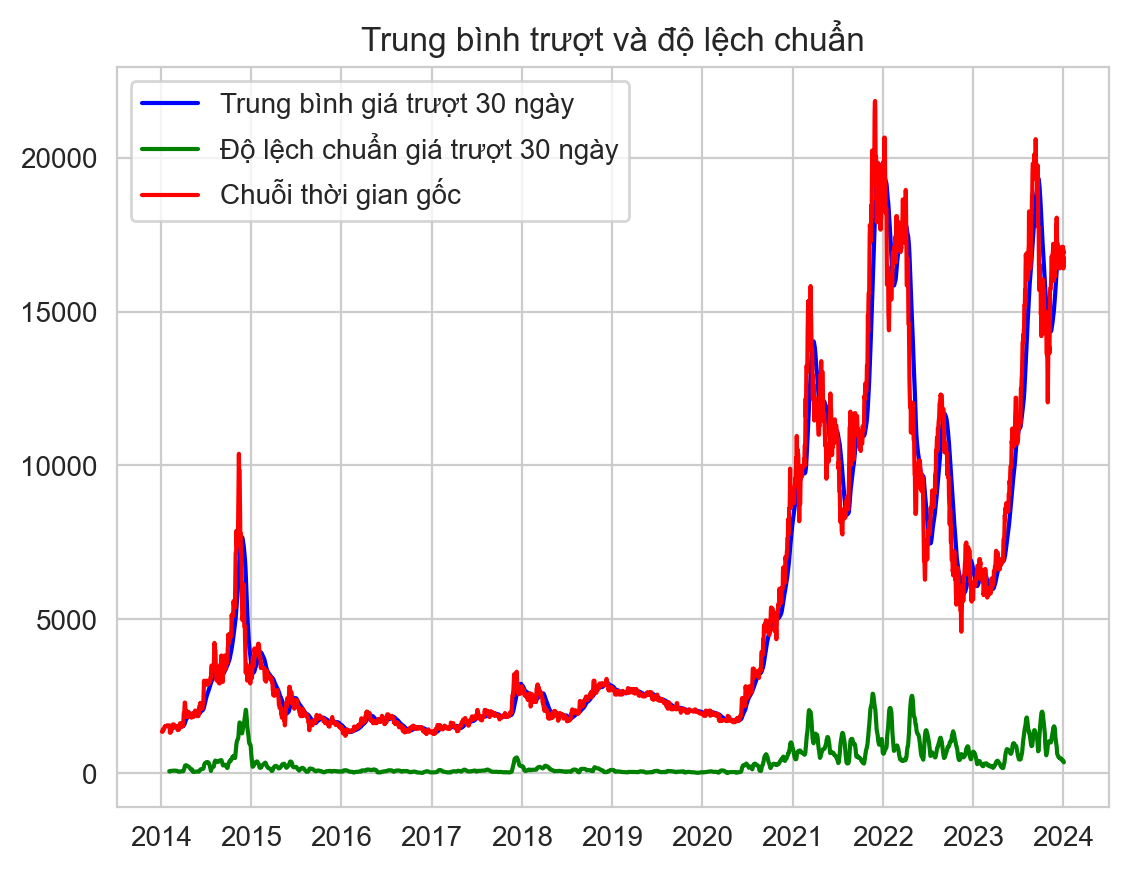

<Figure size 12800x9600 with 0 Axes>

In [56]:
#Testing for stationarity using ADF and KPSS Tests.
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.figure(dpi=200)
    plt.plot(rolling_mean, color='blue', label='Trung bình giá trượt 30 ngày')
    plt.plot(rolling_std_dev, color='green', label = 'Độ lệch chuẩn giá trượt 30 ngày')
    plt.plot(stock_close_price, color='red',label='Chuỗi thời gian gốc')
    plt.legend(loc='best')
    plt.title('Trung bình trượt và độ lệch chuẩn')
    output_file_path = 'rolling_mean_std_close.png'
    plt.savefig(output_file_path, format='png', bbox_inches='tight')
    plt.figure(dpi=2000)
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))
    
stationarity_test(data['close'])

In [57]:

data['Close_Log'] = np.log(data['close'])
data['Close_Detrend'] = (data['close'] - data['close'].shift(30))
data['Close_Detrend'] = data['Close_Detrend'].dropna()
data['Close_Detrend_log'] = (data['Close_Log'] - data['Close_Log'].shift(30))

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -6.015396
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.119626
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Admin\AppData\Local\Temp\ipykernel_11688\3946737647.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)


<Figure size 2400x600 with 0 Axes>

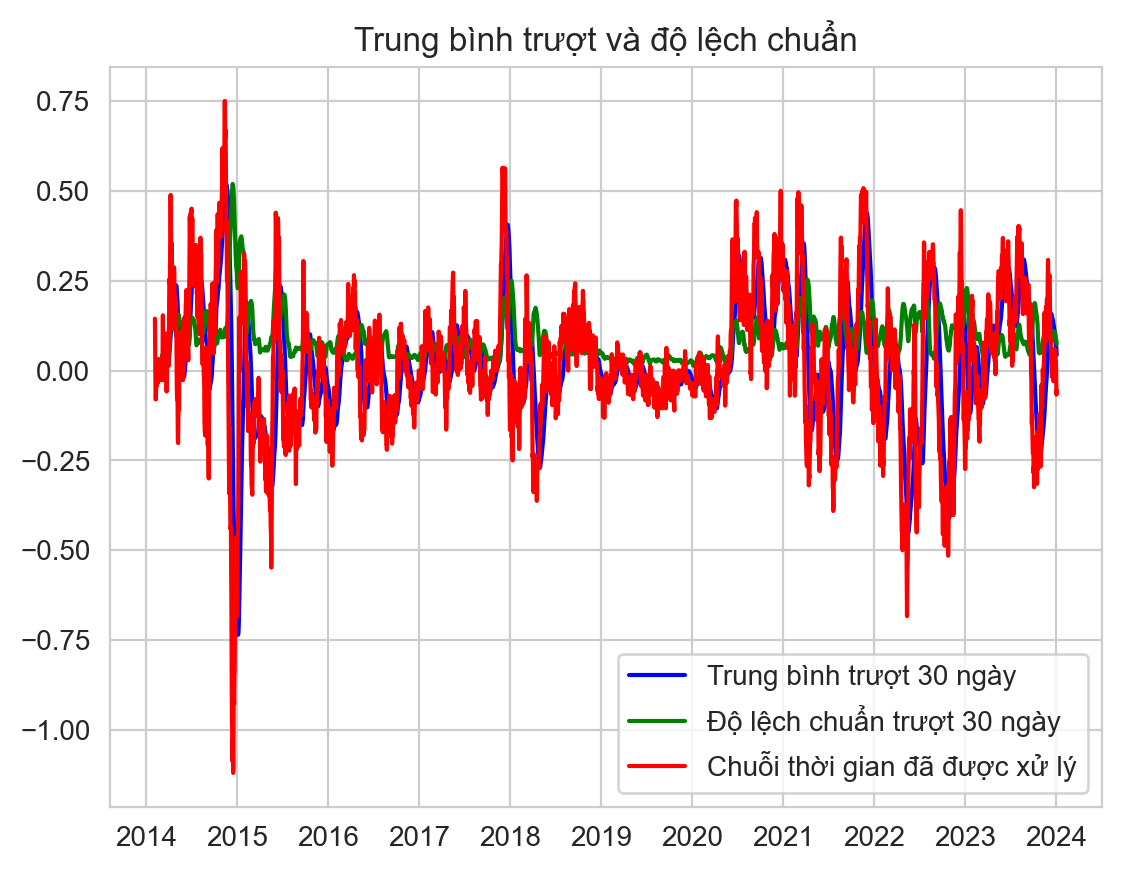

<Figure size 12800x9600 with 0 Axes>

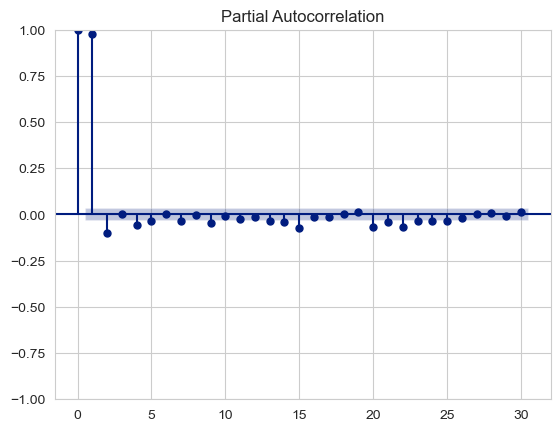

In [58]:
#Testing for stationarity of de-trended time series using ADF and KPSS Tests.
def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.figure(dpi=200)
    plt.plot(rolling_mean, color='blue', label='Trung bình trượt 30 ngày')
    plt.plot(rolling_std_dev, color='green', label = 'Độ lệch chuẩn trượt 30 ngày')
    plt.plot(stock_close_price, color='red',label='Chuỗi thời gian đã được xử lý')
    plt.legend(loc='best')
    plt.title('Trung bình trượt và độ lệch chuẩn')
    output_file_path = 'rolling_mean_std_close_detrend.png'
    plt.savefig(output_file_path, format='png', bbox_inches='tight')
    plt.figure(dpi=2000)
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))

stationarity_test(data['Close_Detrend_log'].dropna())

# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data['Close_Detrend_log'].dropna(), lags=30)


<Figure size 12800x9600 with 0 Axes>

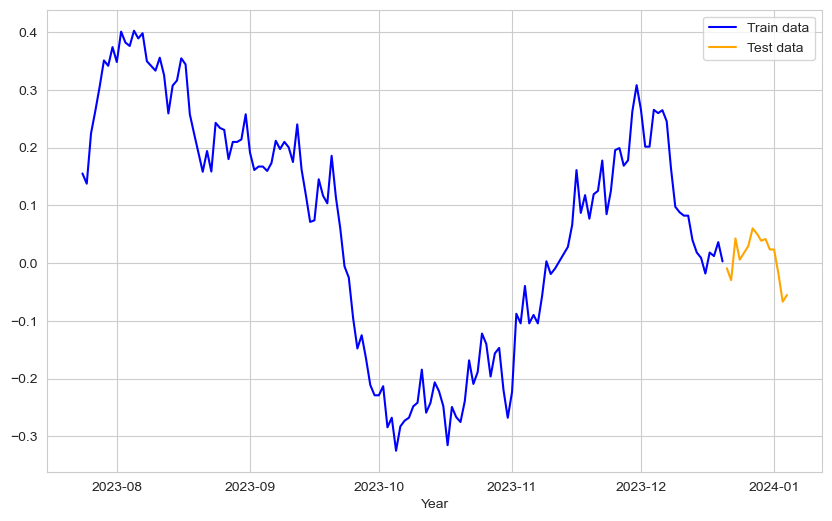

<Figure size 12800x9600 with 0 Axes>

In [59]:
#split data into train and training set
Stock_data_arima = data['Close_Detrend_log'].dropna()
test_size = 15
train_data, test_data = Stock_data_arima[:-test_size], Stock_data_arima[-test_size:]


# Plotting the train and test sets.
plt.figure(figsize=(10,6))
plt.xlabel('Year')
#plt.ylabel('Closing Price')
plt.plot(train_data[-150:], 'blue', label='Train data')
plt.plot(test_data, 'orange', label='Test data')
plt.legend()
output_file_path = 'train_test.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

In [60]:
from pmdarima import auto_arima
from math import *
from statsmodels.tsa.arima.model import ARIMA


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1554.942, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5578.952, Time=0.46 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-8081.528, Time=1.50 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-9408.424, Time=1.44 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12625.624, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-12660.656, Time=0.64 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-12658.671, Time=0.63 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-12665.161, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-12660.576, Time=0.55 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12658.576, Time=0.78 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-12690.599, Time=2.73 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-12671.610, Time=4.18 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-12658.574, Time=0.71 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-12657.484, Time=1.46 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-12656.973

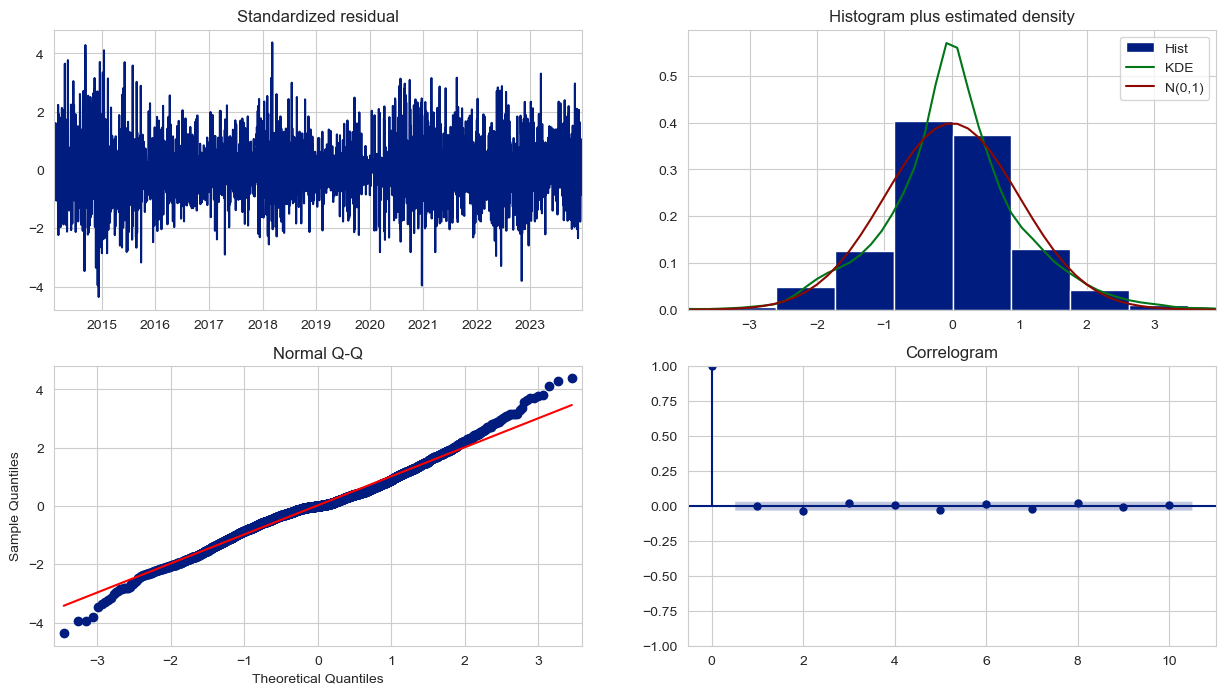

In [61]:

model = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)
print(model.summary())
model.plot_diagnostics(figsize=(15,8))

# Save the plot as a PNG file
output_file_path = 'ARIMA_Diagnostics.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
plt.close()

In [62]:
prediction, confint = model.predict(n_periods= test_size, alpha=0.05, return_conf_int=True)


In [63]:
cf= pd.DataFrame(confint)

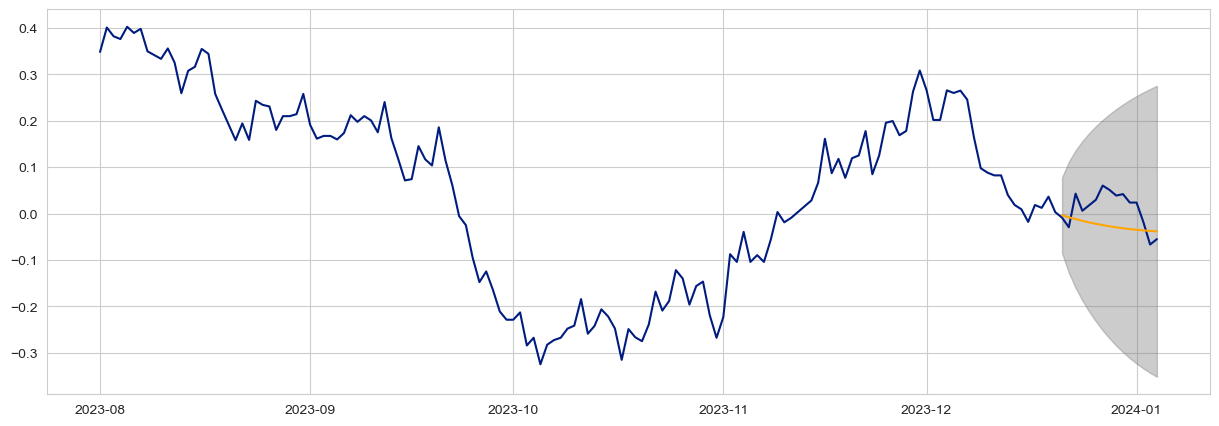

In [64]:
prediction_series = pd.Series(prediction,index=test_data.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(Stock_data_arima.last('6M'))
ax.plot(prediction_series, color = 'orange')
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.4)
# Save the plot as a PNG file
output_file_path = 'ARIMA_TEST.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1574.630, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5614.286, Time=0.68 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-8129.401, Time=3.18 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-9459.652, Time=4.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12690.379, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-12725.458, Time=1.73 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-12723.457, Time=4.00 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-12729.895, Time=1.87 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-12725.434, Time=1.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12723.434, Time=1.52 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-12756.410, Time=9.30 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-12758.966, Time=6.87 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-12723.434, Time=2.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-12722.233, Time=2.95 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-12721.754

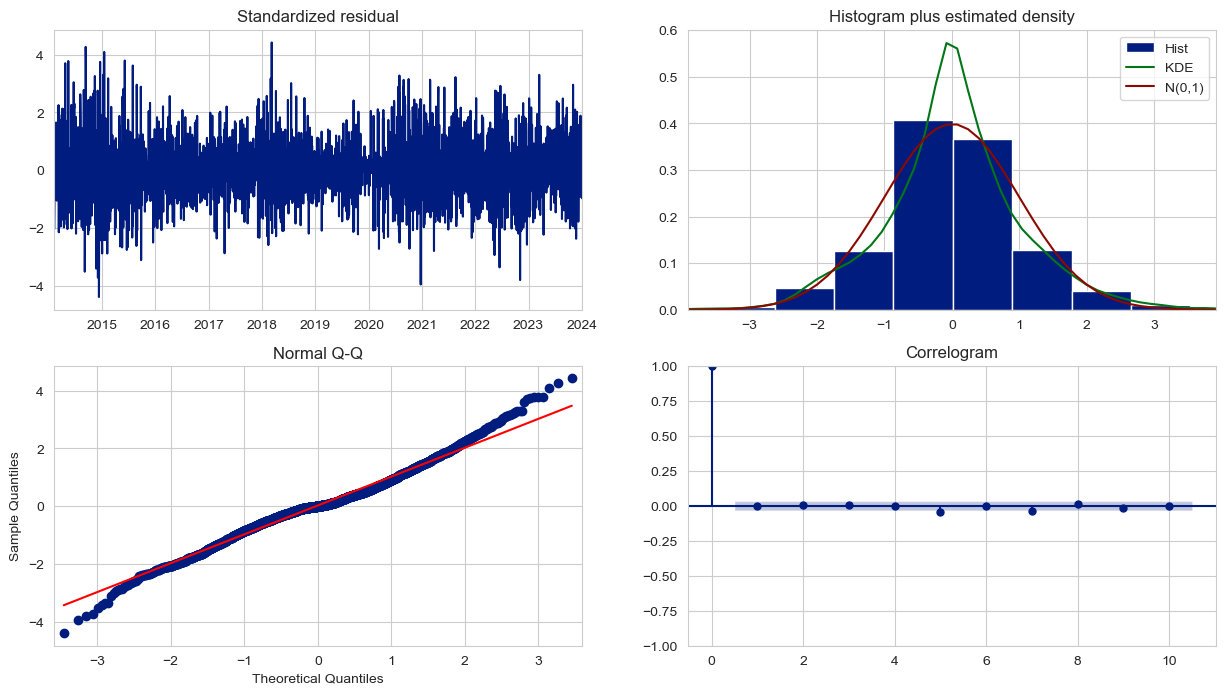

In [63]:
model = auto_arima(Stock_data_arima, start_p=0, start_q=0,
                   test='adf',
                   max_p=3, max_q=3,
                   m=1,
                   d=None,
                   seasonal=False,
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False)

print(model.summary())
model.plot_diagnostics(figsize=(15, 8))
plt.show()

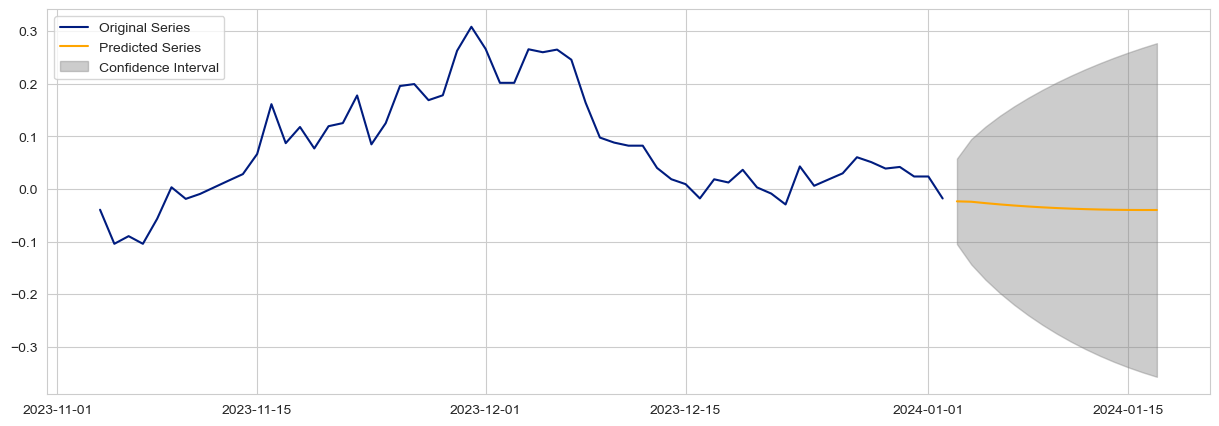

In [64]:
# Predict the next 180 days
forecast, confint = model.predict(n_periods=15, 
                                  alpha=0.05, 
                                  return_conf_int=True)

# Create a DataFrame for confidence intervals
cf = pd.DataFrame(confint, columns=['lower', 'upper'])

# Create a time index for the next 180 days
next_15_days_index = pd.date_range(start=Stock_data_arima.index[-1] 
                                    + pd.DateOffset(1), 
                                    periods=15)

# Create a Series for the prediction with the new time index
prediction_series = pd.Series(forecast, index=next_15_days_index)

# Plot the original series and the predicted series with confidence intervals
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(Stock_data_arima[-60:], label='Original Series')
ax.plot(prediction_series, label='Predicted Series', color = 'orange')
ax.fill_between(prediction_series.index, 
                cf['lower'], cf['upper'], 
                color='grey', alpha=0.4, 
                label='Confidence Interval')
ax.legend(loc = 'upper left')

# Save the plot as a PNG file
output_file_path = 'ARIMA_predict_15.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
plt.close()

In [66]:
returns =  100* data.close.pct_change().dropna()

Text(0.5, 1.0, 'VIX Returns')

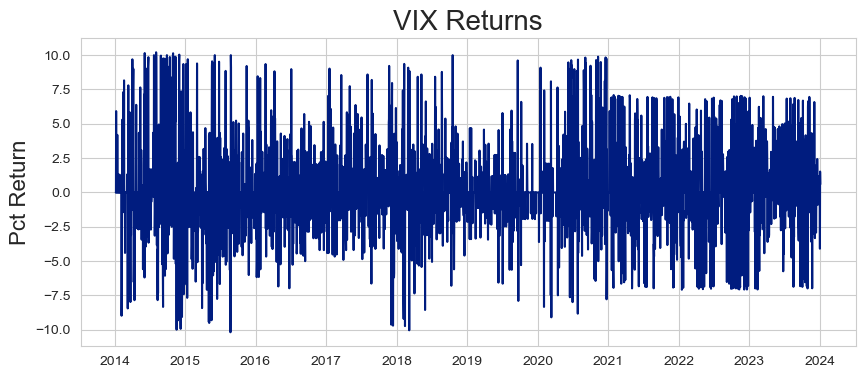

In [67]:

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('VIX Returns', fontsize=20)

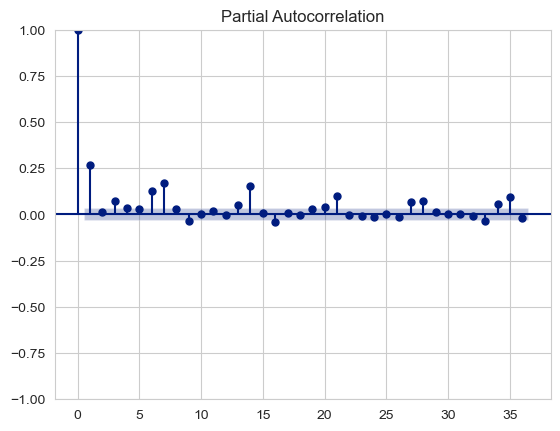

In [68]:
plot_pacf(returns**2)

# Save the plot as a PNG file
output_file_path = 'PACF_RET.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
plt.close()

In [69]:
from arch import arch_model
model = arch_model(returns, p=1, q=1)

In [70]:
from arch import arch_model
model = arch_model(returns, p=1, q=1)

In [71]:

model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6959342812.0241
Iteration:      2,   Func. Count:     15,   Neg. LLF: 20304.60355568659
Iteration:      3,   Func. Count:     24,   Neg. LLF: 9001.931007469319
Iteration:      4,   Func. Count:     30,   Neg. LLF: 9066.655219339533
Iteration:      5,   Func. Count:     38,   Neg. LLF: 8999.343725668812
Iteration:      6,   Func. Count:     44,   Neg. LLF: 8961.507735526897
Iteration:      7,   Func. Count:     49,   Neg. LLF: 8961.507560684493
Iteration:      8,   Func. Count:     53,   Neg. LLF: 8961.507560676173
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8961.507560684493
            Iterations: 8
            Function evaluations: 53
            Gradient evaluations: 8


In [72]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8961.51
Distribution:                  Normal   AIC:                           17931.0
Method:            Maximum Likelihood   BIC:                           17955.8
                                        No. Observations:                 3650
Date:                Thu, Jan 04 2024   Df Residuals:                     3649
Time:                        21:38:24   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1048  4.517e-02      2.321  2.030e-02 [1.630e-02,  0.193]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.1435      0.108      1.325      0.185  [-6.873e-02,  0.356]
alpha[1]       0.0459  1.505e-02      3.051  2.278e-03 [1.643e-02,7.544e-02]
beta[1]        0.9379  2.655e-02     35.320 2.852e-273     [  0.886,  0.990]
============================================================================

Covariance estimator: robust
"""

In [73]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [74]:
rolling_predictions = pd.Series(rolling_predictions, 
                                index=returns.index[-365:])

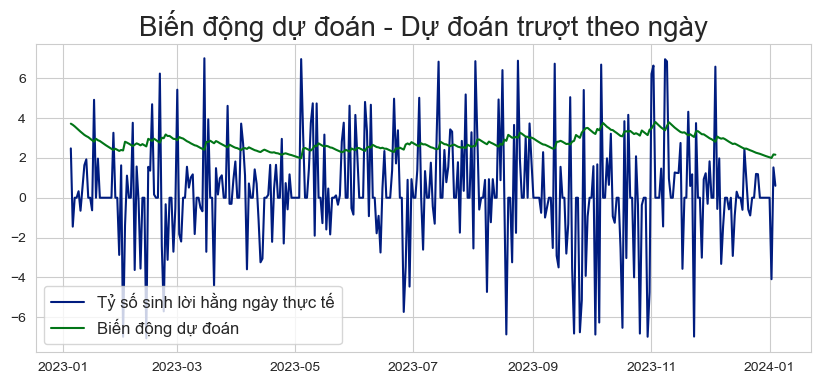

In [75]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Biến động dự đoán - Dự đoán trượt theo ngày', fontsize=20)
plt.legend(['Tỷ số sinh lời hằng ngày thực tế', 'Biến động dự đoán'],
           loc = 'lower left', fontsize=12)
# Save the plot as a PNG file
output_file_path = 'Garch_roll.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
plt.close()

In [76]:
from datetime import timedelta

pred = model_fit.forecast(horizon=15)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,16)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

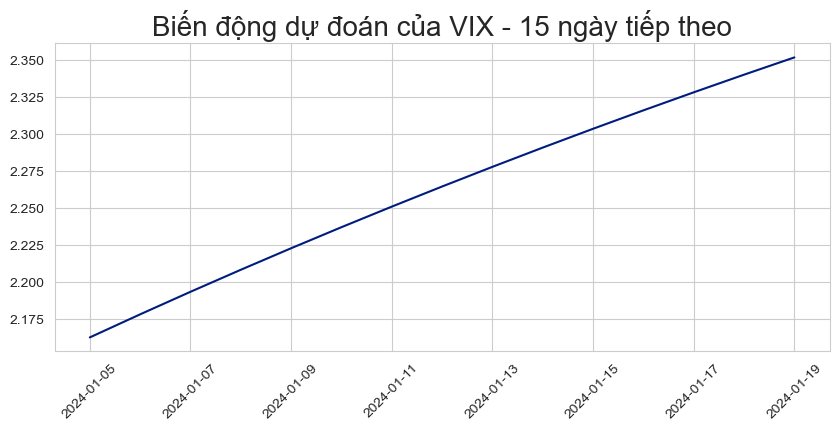

In [77]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.xticks(rotation = 45)
plt.title('Biến động dự đoán của VIX - 15 ngày tiếp theo', fontsize=20)
output_file_path = 'Garch_15.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
plt.close()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4402.246, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8753.548, Time=0.73 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-11101.171, Time=1.43 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-12657.745, Time=2.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-16078.738, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-16078.288, Time=0.60 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-16076.873, Time=0.67 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-16095.118, Time=0.87 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-16078.243, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-16088.999, Time=1.95 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-16075.682, Time=1.75 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-16094.412, Time=1.36 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-16077.221, Time=0.89 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-16086.922, Time=3.36 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Tim

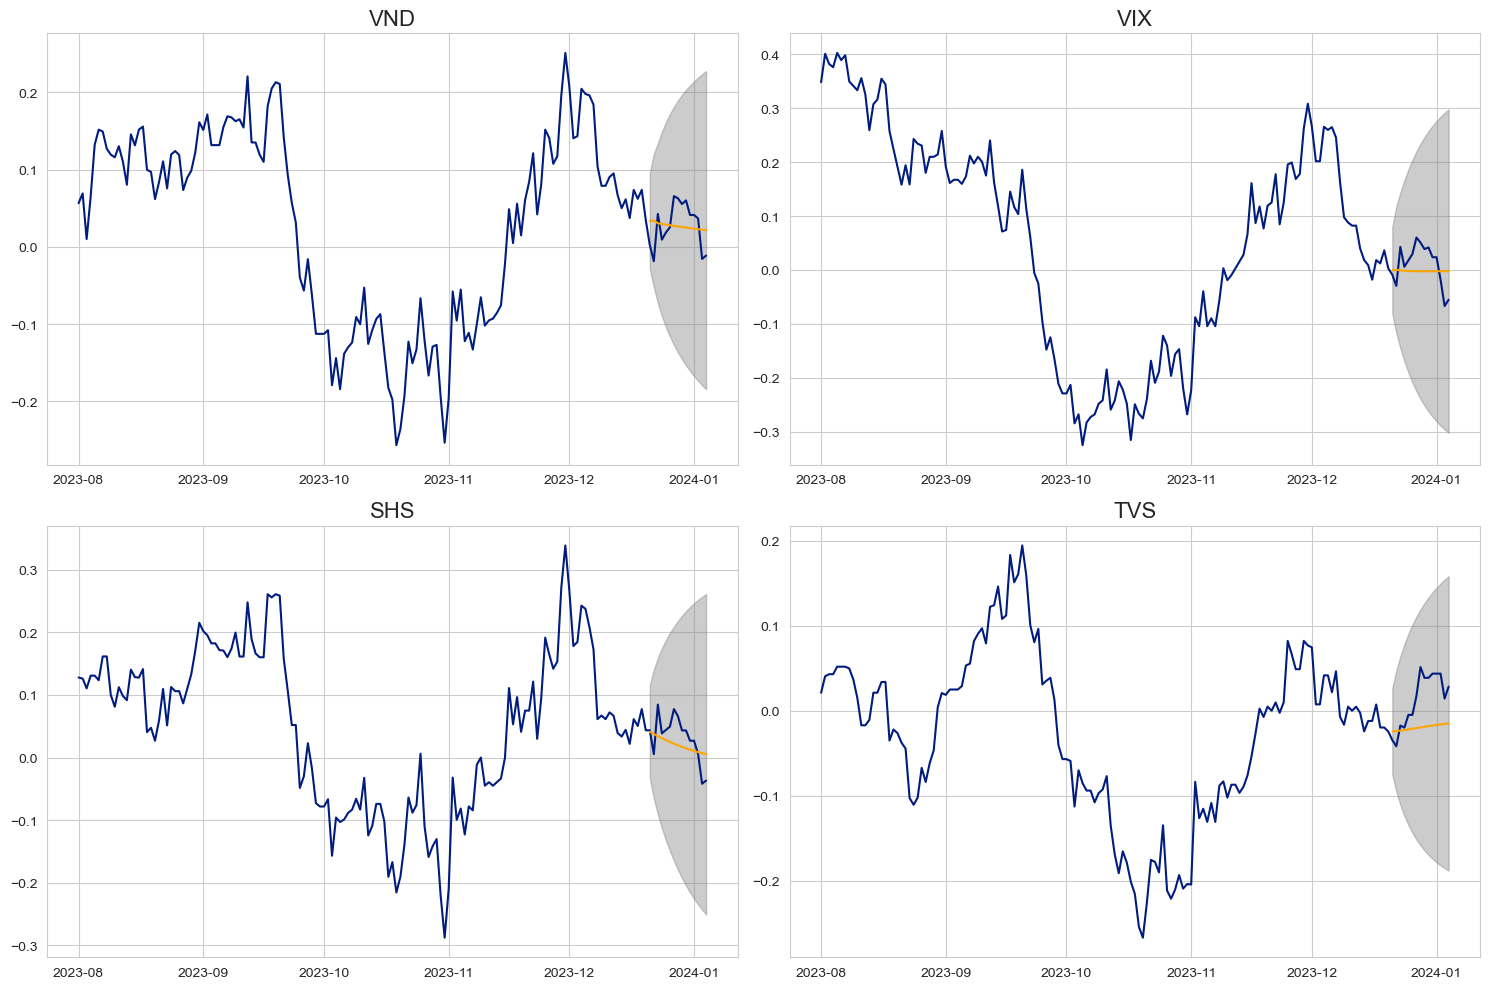

In [78]:
import math
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from datetime import datetime 
import vnstock as vn

# List of stock codes
last_stock_list = ["VND", "VIX", "SHS", "TVS"]

end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

# Determine the number of rows for the subplot
n = len(last_stock_list)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D', type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])
    data['Close_Detrend'] = (data['close'] - data['close'].shift(30))
    data['Close_Detrend'] = data['Close_Detrend'].dropna()
    data['Close_Detrend_log'] = (data['Close_Log'] - data['Close_Log'].shift(30))
    

    Stock_data_arima = data['Close_Detrend_log'].dropna()
    test_size = 15
    train_data, test_data = Stock_data_arima[:-test_size], Stock_data_arima[-test_size:]

    model = auto_arima(train_data, start_p=0, start_q=0,
                          test='adf',       
                          max_p=3, max_q=3, 
                          m=1,              
                          d=None,           
                          seasonal=False,   
                          start_P=0, 
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=False)

    prediction, confint = model.predict(n_periods= test_size, alpha=0.05, return_conf_int=True)
    cf= pd.DataFrame(confint)

    prediction_series = pd.Series(prediction,index=test_data.index)

    ax = axs[i//ncols, i%ncols]
    ax.plot(Stock_data_arima.last('6M'))
    ax.plot(prediction_series, color = 'orange')
    ax.fill_between(prediction_series.index, cf[0], cf[1], color='grey', alpha=.4)
    ax.set_title(stock_code, fontsize = 16)

plt.tight_layout()
output_file_path = 'ARIMA_ALL_TEST.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
plt.close()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4432.689, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8795.458, Time=0.69 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-11154.084, Time=1.22 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-12711.990, Time=2.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-16143.699, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-16143.297, Time=0.64 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-16141.880, Time=0.63 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-16159.949, Time=1.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-16143.251, Time=0.51 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-16161.907, Time=2.76 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-16140.562, Time=1.03 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-16159.415, Time=1.59 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-16142.232, Time=2.41 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-16151.459, Time=7.87 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Tim

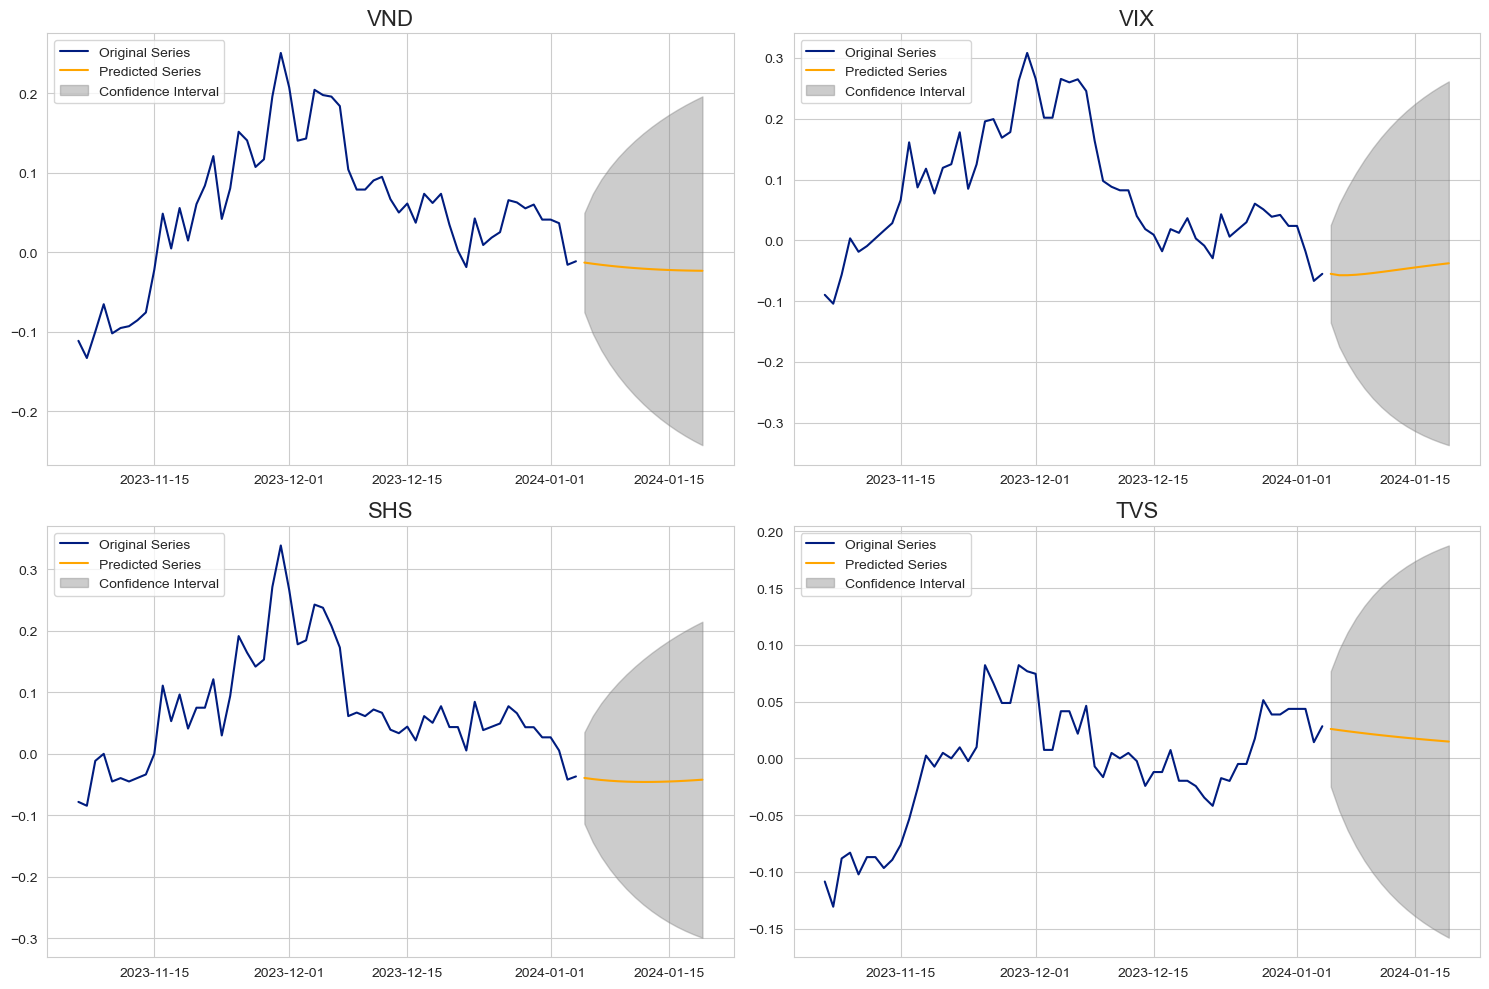

In [79]:
from pmdarima import auto_arima
from datetime import datetime 
import vnstock as vn
import math
import matplotlib.pyplot as plt

# List of stock codes
last_stock_list = ["VND", "VIX", "SHS", "TVS"]

end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')
test_size = 15

fig, axs = plt.subplots(math.ceil(len(last_stock_list) / 2), 2, figsize=(15, 5 * math.ceil(len(last_stock_list) / 2)))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D',
                                    type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])
    data['Close_Detrend'] = (data['close'] - data['close'].shift(30))
    data['Close_Detrend'] = data['Close_Detrend'].dropna()
    data['Close_Detrend_log'] = (data['Close_Log'] - data['Close_Log'].shift(30))


    Stock_data_arima = data['Close_Detrend_log'].dropna()
    train_data, test_data = Stock_data_arima[:-test_size], Stock_data_arima[-test_size:]

    model = auto_arima(Stock_data_arima, start_p=0, start_q=0,
                       test='adf',
                       max_p=3, max_q=3,
                       m=1,
                       d=None,
                       seasonal=False,
                       start_P=0,
                       D=0,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise= False)

    forecast, confint = model.predict(n_periods=15, 
                                      alpha=0.05, 
                                      return_conf_int=True)

    cf = pd.DataFrame(confint, columns=['lower', 'upper'])
    next_15_days_index = pd.date_range(start=Stock_data_arima.index[-1] 
                                        + pd.DateOffset(1), 
                                        periods=15)
    prediction_series = pd.Series(forecast, index=next_15_days_index)

    ax = axs[i // 2, i % 2]
    ax.plot(Stock_data_arima[-60:], label='Original Series')
    ax.plot(prediction_series, label='Predicted Series', color = 'orange')
    ax.fill_between(prediction_series.index, 
                    cf['lower'], cf['upper'], 
                    color='grey', alpha=0.4, 
                    label='Confidence Interval')
    ax.legend(loc = 'upper left')
    ax.set_title(stock_code, fontsize = 16)

plt.tight_layout()
output_file_path = 'ARIMA_ALL_FORC.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
plt.close()

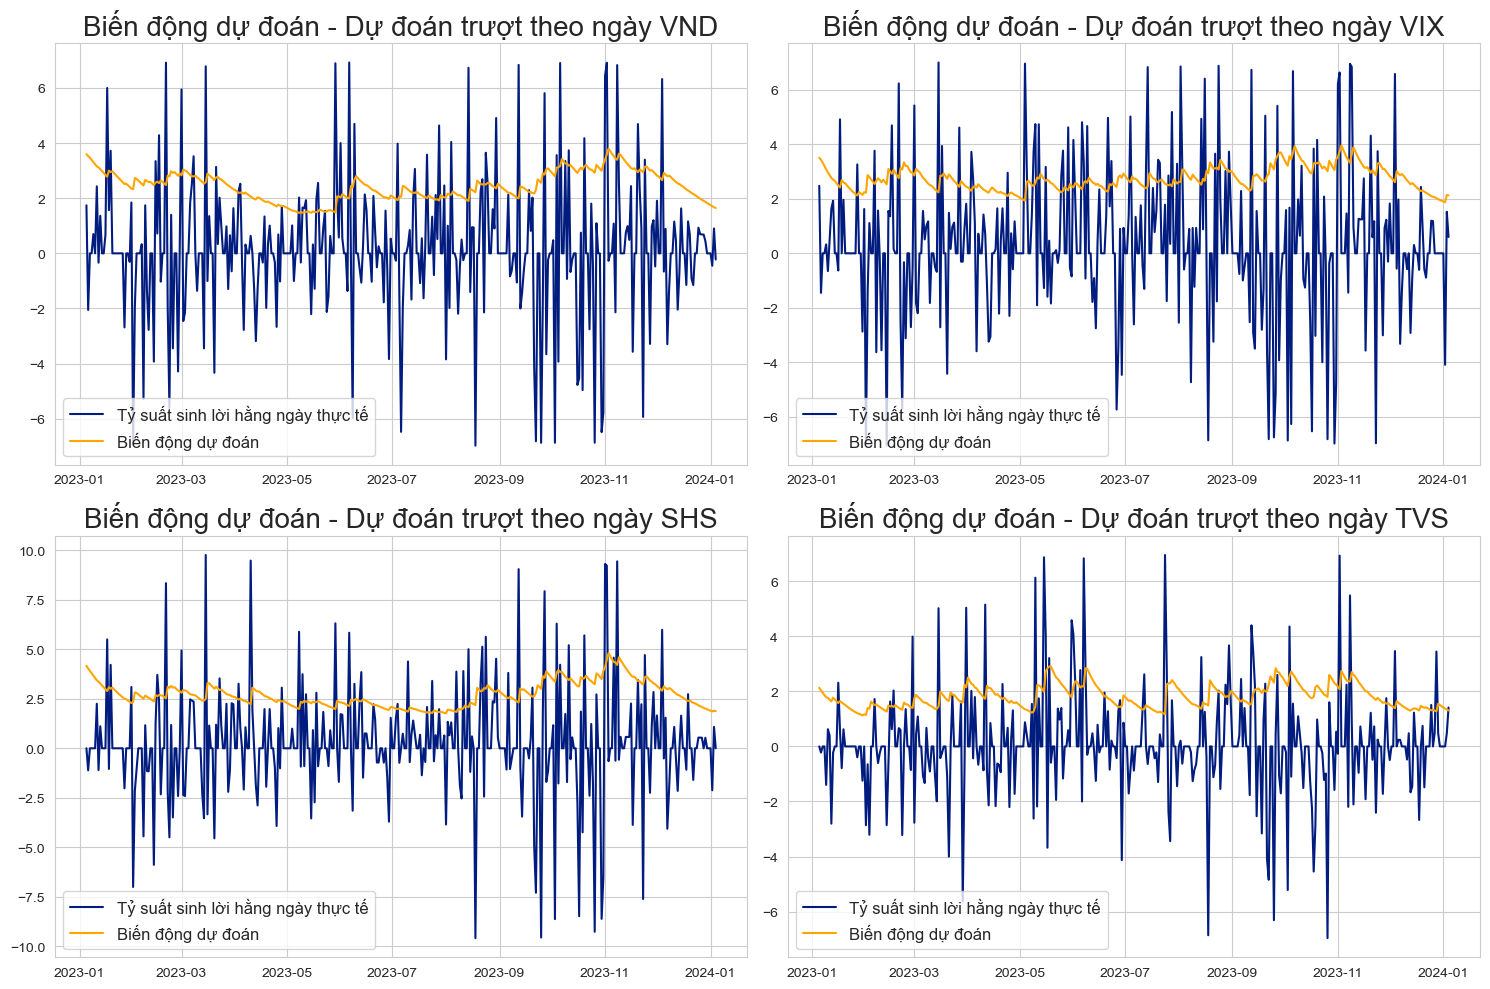

In [80]:
from pmdarima import auto_arima
from math import *
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime 
from dateutil.relativedelta import relativedelta
from arch import arch_model
import vnstock as vn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

last_stock_list = ["VND", "VIX", "SHS", "TVS"]
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D',
                                    type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  

    # Set the frequency to daily and forward fill missing values
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])

    returns =  100* data.close.pct_change().dropna()

    rolling_predictions = []
    test_size = 365

    for j in range(test_size):
        train = returns[:-(test_size-j)]
        model = arch_model(train, p=1, q=1)
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
    rolling_predictions = pd.Series(rolling_predictions, 
                                    index=returns.index[-365:])
    ax = axs[i//2, i%2]
    true, = ax.plot(returns[-365:])
    preds, = ax.plot(rolling_predictions, color = 'orange')
    ax.set_title('Biến động dự đoán - Dự đoán trượt theo ngày ' + stock_code, fontsize=20)
    ax.legend(['Tỷ suất sinh lời hằng ngày thực tế', 'Biến động dự đoán'],
               loc = 'lower left', fontsize=12)

plt.tight_layout()
output_file_path = 'GARCH_ALL_TEST.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
plt.close()

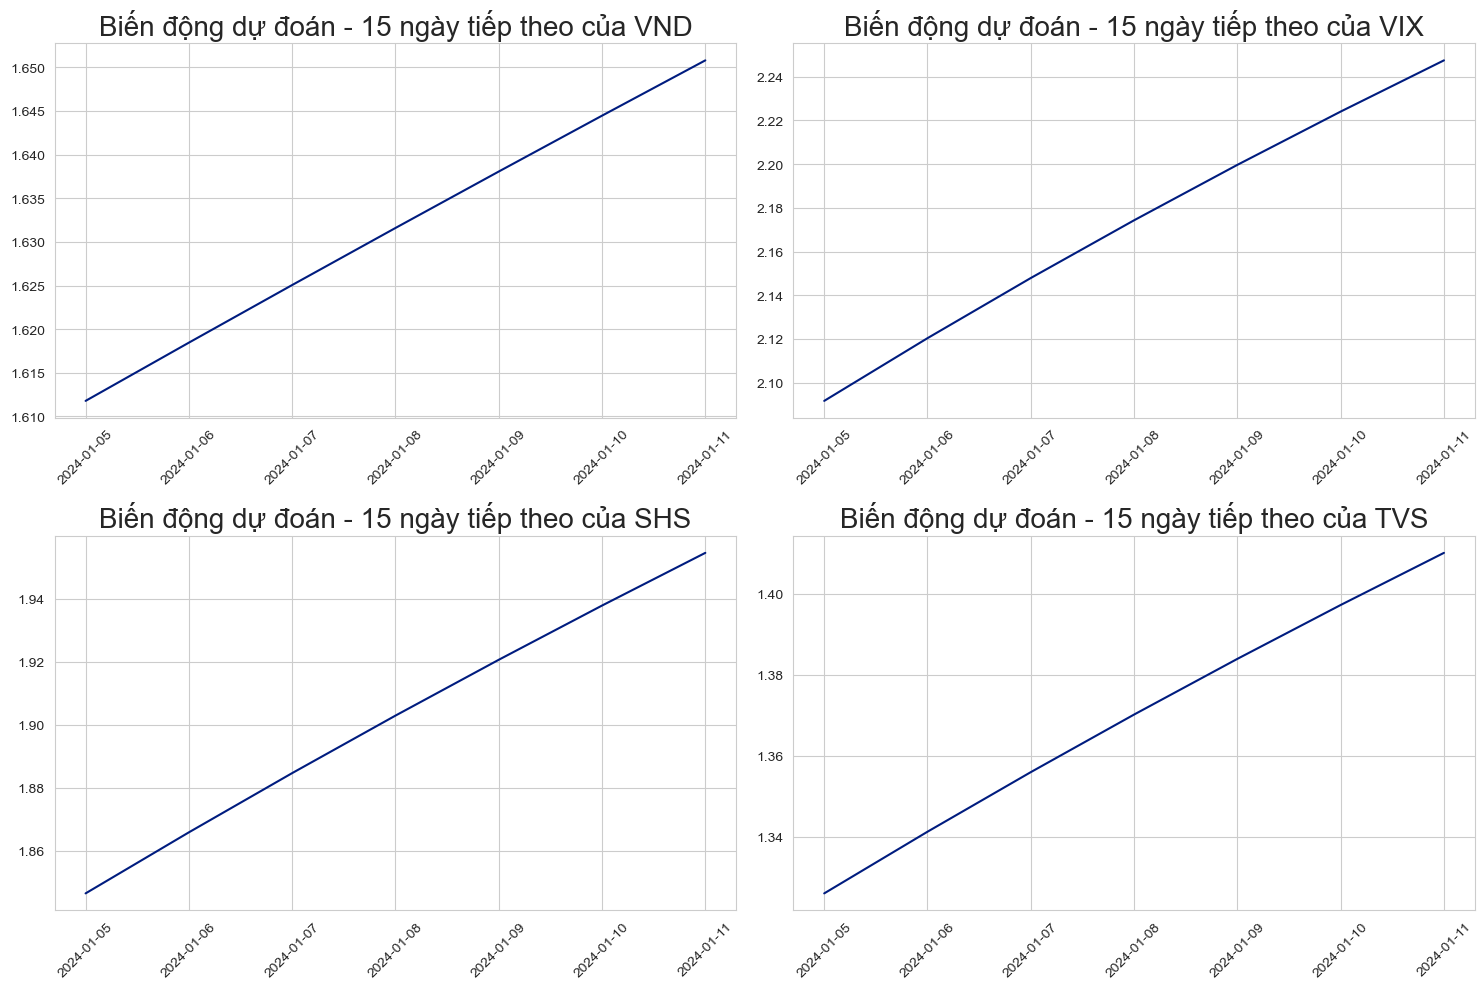

In [81]:
from pmdarima import auto_arima
from math import *
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta 
from dateutil.relativedelta import relativedelta
from arch import arch_model
import vnstock as vn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

last_stock_list = ["VND", "VIX", "SHS", "TVS"]
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D',
                                    type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  

    # Set the frequency to daily and forward fill missing values
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])

    returns =  100* data.close.pct_change().dropna()

    model = arch_model(returns, p=1, q=1)
    model_fit = model.fit(disp='off')

    pred = model_fit.forecast(horizon=7)
    future_dates = [returns.index[-1] + timedelta(days=j) for j in range(1,8)]
    pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

    ax = axs[i//2, i%2]
    ax.plot(pred)
    ax.set_title('Biến động dự đoán - 15 ngày tiếp theo của ' + stock_code, fontsize=20)
    ax.set_xticks(pred.index)
    ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in pred.index], rotation=45)

plt.tight_layout()
output_file_path = 'GARCH_ALL_FORC.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
plt.close()
